# Students' Performance Analysis With 5 Recommendations

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None 
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
 
plt.style.use('fivethirtyeight')


In [3]:
df=pd.read_csv(r'C:\Users\HP\Downloads\py\Student Analysis\projects base\1 Student Performance Analysis\Expanded_data_with_more_features.csv')
df.shape

(30641, 15)

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [51]:
df = df.dropna(how='any')

In [52]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
pass_math              0
pass_reading           0
pass_writing           0
total_score            0
percentage             0
result                 0
dtype: int64

**Drop un_named column**

In [9]:
df = df.drop("Unnamed: 0",axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [10]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Descriptive Statistics

In [11]:

# Calculate mean, median, mode, and standard deviation
mean = df[['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']].mean()
median = df[['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']].median()
mode = df[['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']].mode()
std_dev = df[['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']].std()

print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nStandard Deviation:\n", std_dev)

Mean:
 MathScore       66.558402
ReadingScore    69.377533
WritingScore    68.418622
NrSiblings       2.145894
dtype: float64

Median:
 MathScore       67.0
ReadingScore    70.0
WritingScore    69.0
NrSiblings       2.0
dtype: float64

Mode:
    MathScore  ReadingScore  WritingScore  NrSiblings
0         64            65            67         1.0

Standard Deviation:
 MathScore       15.361616
ReadingScore    14.758952
WritingScore    15.443525
NrSiblings       1.458242
dtype: float64


# EDA

# Distrubtion of Gender and Luch Type

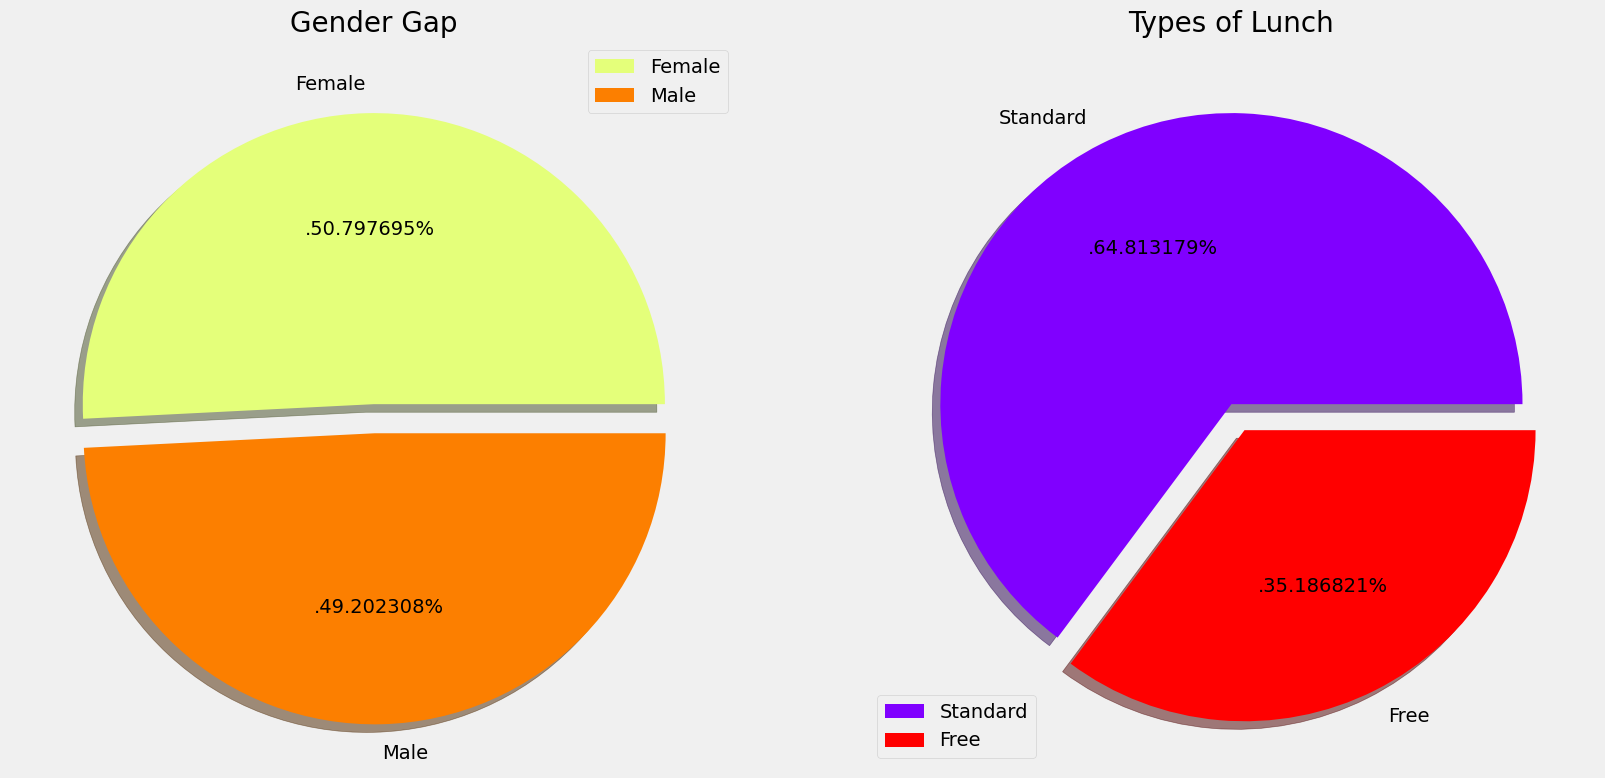

In [53]:
# visualising the number of male and female in the dataset

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
size = df['Gender'].value_counts()
labels = 'Female', 'Male'
color = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()


plt.subplot(1, 2, 2)
size = df['LunchType'].value_counts()
labels = 'Standard', 'Free'
color = plt.cm.rainbow(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Types of Lunch', fontsize = 20)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()

# Distribuation of Ethenic Groups

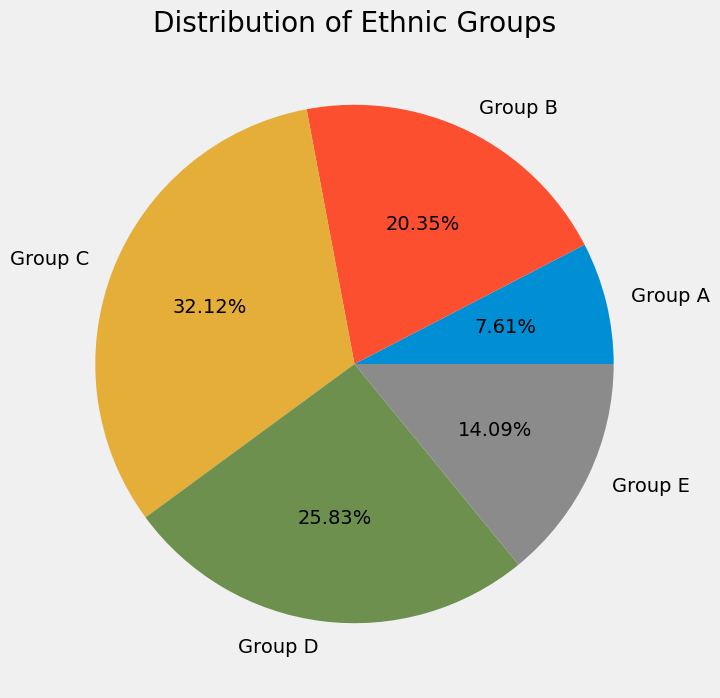

In [54]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].shape[0]
groupB = df.loc[(df["EthnicGroup"] == "group B")].shape[0]
groupC = df.loc[(df["EthnicGroup"] == "group C")].shape[0]
groupD = df.loc[(df["EthnicGroup"] == "group D")].shape[0]
groupE = df.loc[(df["EthnicGroup"] == "group E")].shape[0]

l = ["Group A", "Group B", "Group C", "Group D", "Group E"]
mylist = [groupA, groupB, groupC, groupD, groupE]

plt.pie(mylist, labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

# visualizing the differnt parental education levels





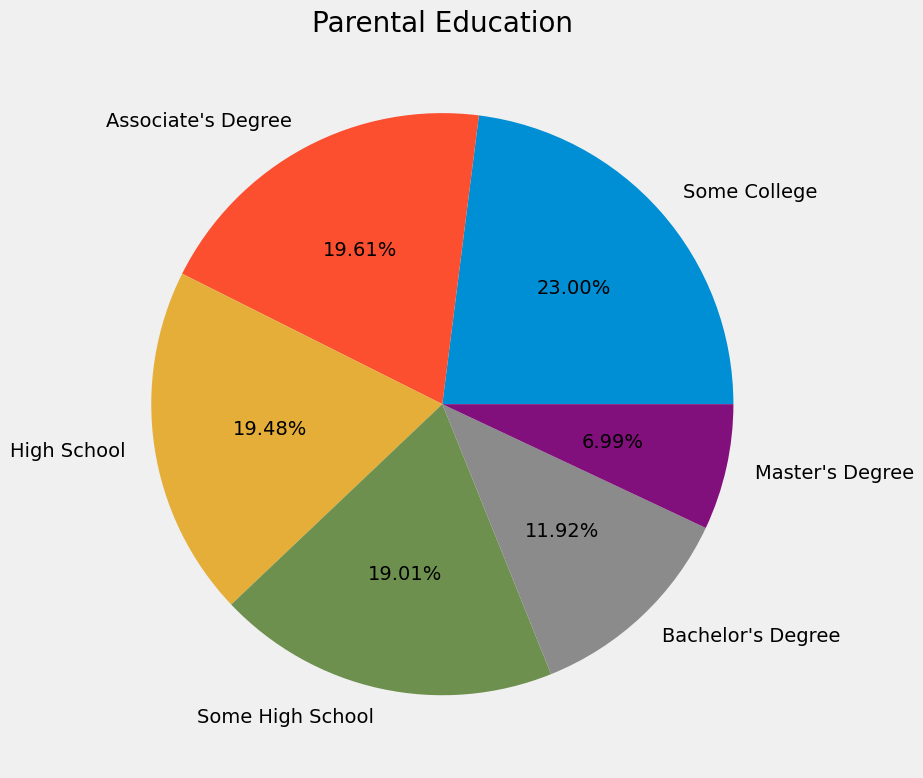

In [55]:
# Subplot 5: Parental Level of Education
size = df['ParentEduc'].value_counts()
labels = ['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"]
plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

(-1.25, 1.25, -1.25, 1.25)

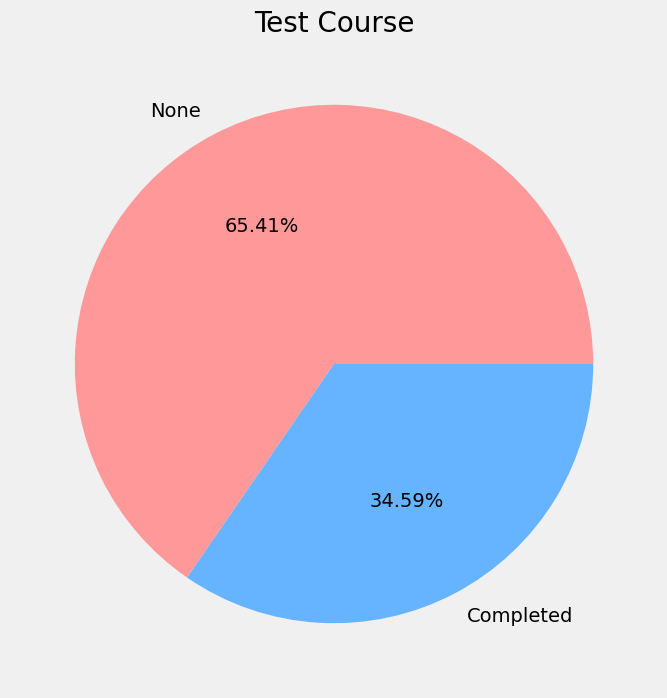

In [56]:
# Subplot 4: Test Preparation Course
size = df['TestPrep'].value_counts()
labels = ('None', 'Completed')  
color = ['#ff9999', '#66b3ff']  # Soft pink and sky blue
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# All three subjects socre distribution

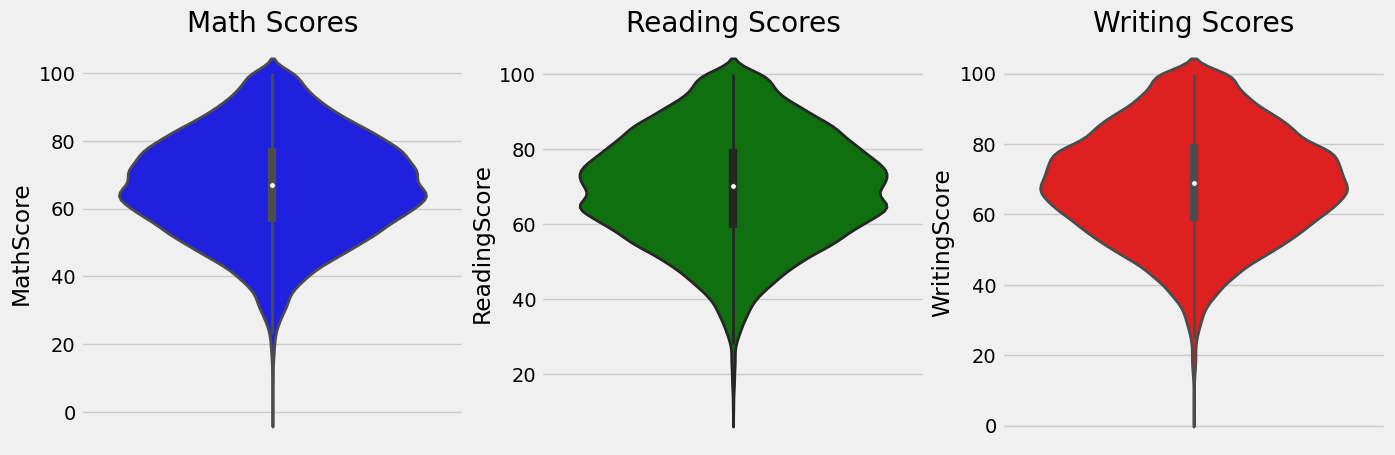

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Math Scores')
sns.violinplot(y='MathScore',data=df,color='blue',linewidth=2)
plt.subplot(132)
plt.title('Reading Scores')
sns.violinplot(y='ReadingScore',data=df,color='green',linewidth=2)
plt.subplot(133)
plt.title('Writing Scores')
sns.violinplot(y='WritingScore',data=df,color='red',linewidth=2)
plt.show()

# Insights from EDA

- Number of Male and Female students is almost equal
- Number of students who have standard lunch are greater
- Number students are greatest in Group C
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
- Number of students who have not enrolled in any test preparation course is greater
- Maximum number of students have scored between 60-80 marks in all 3 subjects

# Pass score Percentage in Each subject

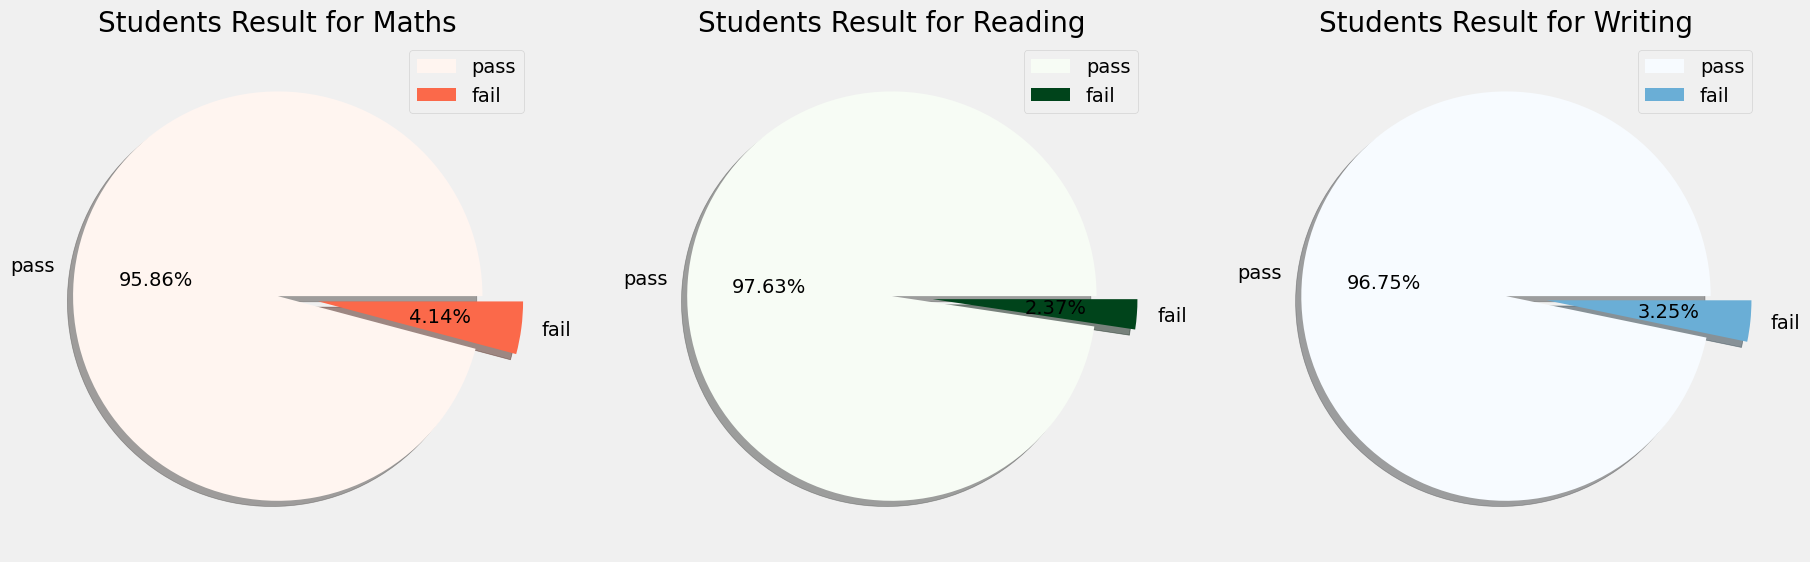

In [58]:
# feature engineering on the data to visualize and solve the dataset more accurately
# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40
plt.rcParams['figure.figsize'] = (20, 10)

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['MathScore']< passmarks, 'Fail', 'Pass')
df['pass_reading'] = np.where(df['ReadingScore']< passmarks, 'Fail', 'Pass')
df['pass_writing'] = np.where(df['WritingScore']< passmarks, 'Fail', 'Pass')

# pie chart to represent the ratio of pass and fail status between the students

size = df['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = df['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = df['pass_writing'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()

plt.show()

**Only 4.14% students are failed in Maths, 2.37% in Reading and 3.25% in Writing**

# Feature Engineering

# Total Score

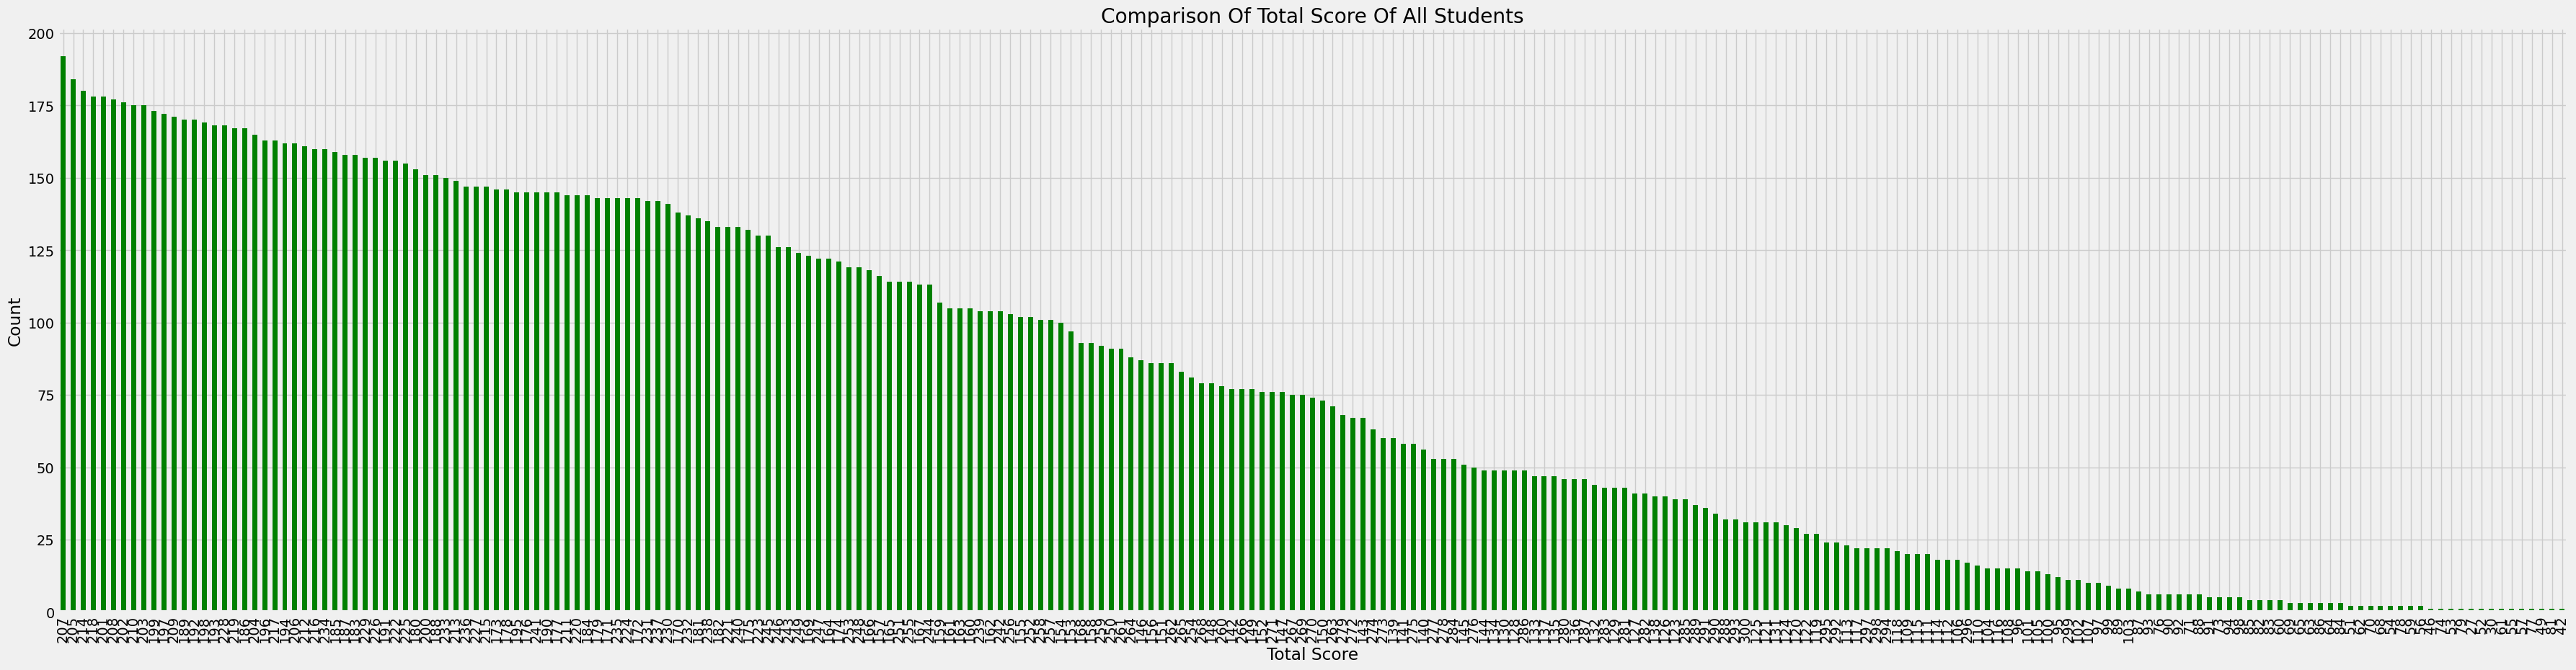

In [59]:
df['total_score'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']

df['total_score'].value_counts(normalize = True)
df['total_score'].value_counts(dropna = True).plot.bar(color = 'green', figsize = (40,10))

plt.title('Comparison Of Total Score Of All Students')
plt.xlabel('Total Score')
plt.ylabel('Count')
plt.show()

**Maximum number of students had a Total Score of 207. followed by 205, 214**



# calculating percentage scored by each student

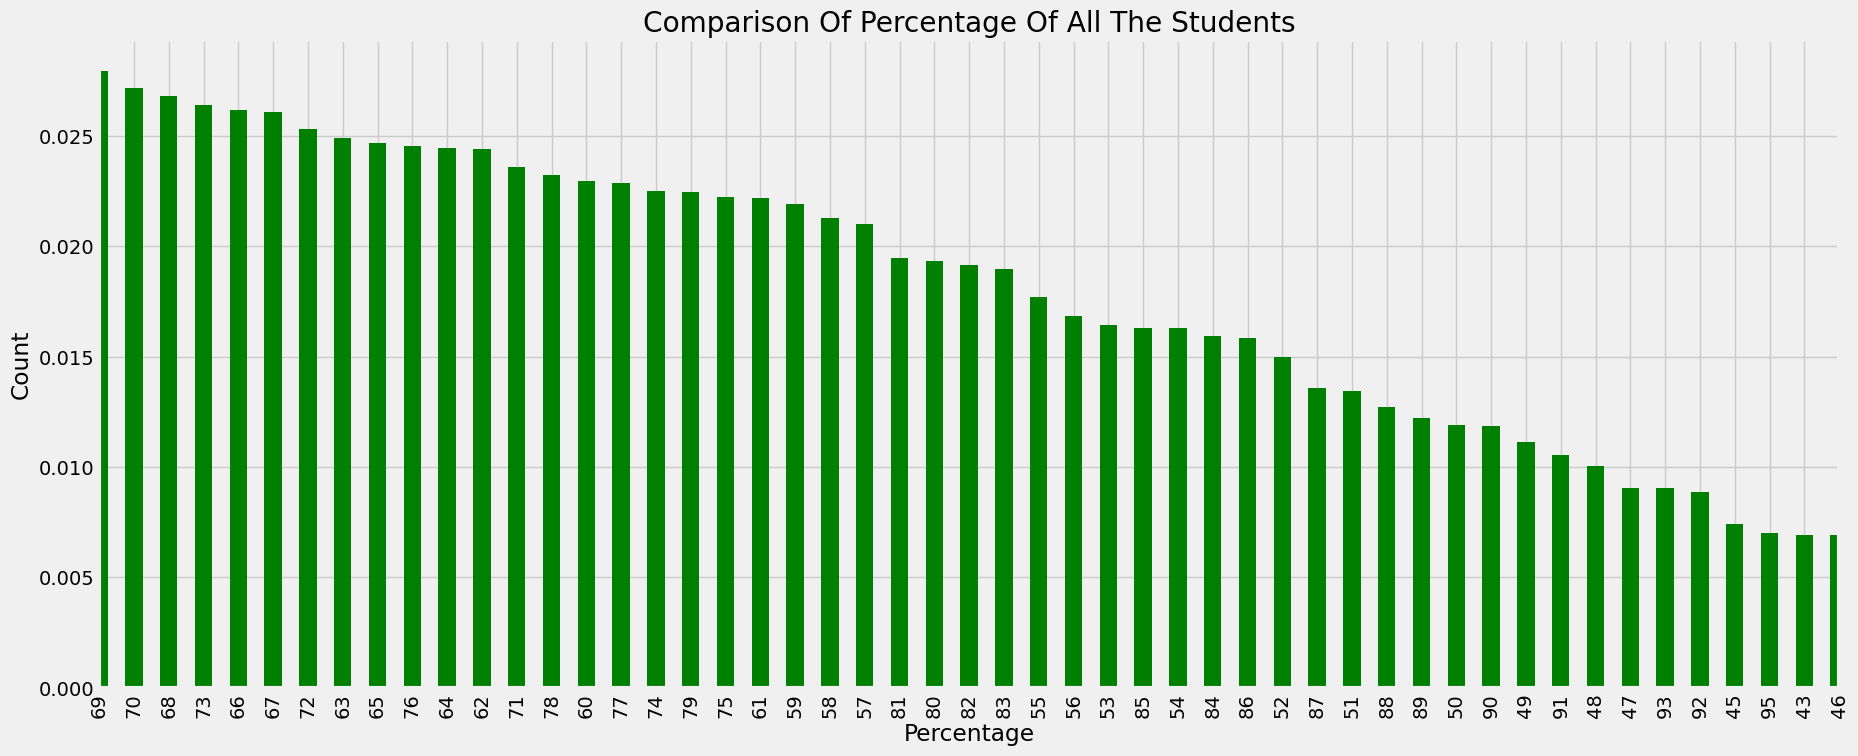

In [65]:
from math import ceil
import matplotlib.pyplot as plt

# Calculate percentage
df['percentage'] = df['total_score'] / 3

# Round percentage to 1 decimal place
df['percentage'] = df['percentage'].apply(lambda x: round(x, 1))

# Ceil percentage
df['percentage'] = df['percentage'].apply(ceil)

# Plot percentage distribution
df['percentage'].value_counts(normalize=True).plot.bar(figsize=(20, 8), color='green')

plt.title('Comparison Of Percentage Of All The Students')
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.xlim(0, 50)  # Limit x-axis to 50%
plt.show()

**Maximum number of students scored 69%**

# Assigning Pass/Fail through overall score

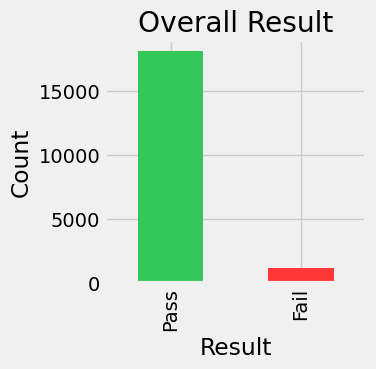

Pass    18121
Fail     1122
Name: result, dtype: int64

In [61]:
df['result'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'Pass', axis = 1)

df['result'].value_counts(dropna = False).plot.bar(color = ['#34C759', '#FF3737'], figsize = (3, 3))
plt.title('Overall Result')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

df['result'].value_counts()

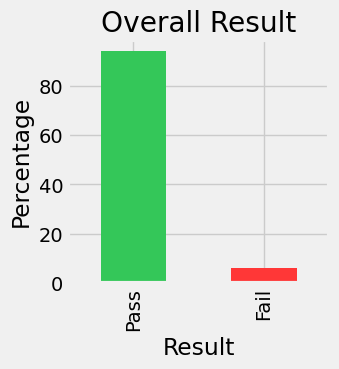

Pass    94.169308
Fail     5.830692
Name: result, dtype: float64


In [62]:
df['result'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'Pass', axis = 1)

# Calculate percentage
percentage_passed = (df['result'].value_counts(normalize=True) * 100)

# Plot percentage
percentage_passed.plot.bar(color = ['#34C759', '#FF3737'], figsize = (3, 3))
plt.title('Overall Result')
plt.xlabel('Result')
plt.ylabel('Percentage')
plt.show()

# Display percentage
print(percentage_passed)

# Assigning grades according to marks scored by students

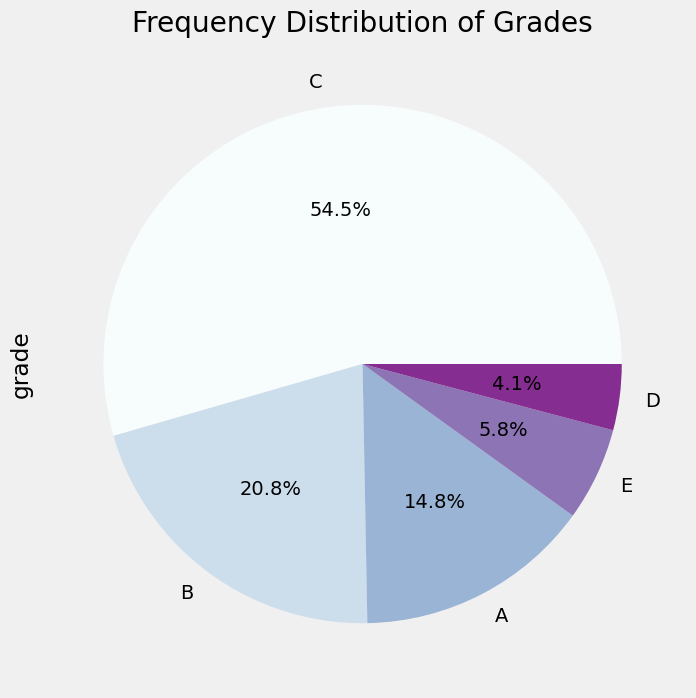

In [70]:

colors = plt.cm.BuPu(np.linspace(0, 1, 6))  # Use 6 colors for 6 grades

df['grade'].value_counts().plot.pie(title='Frequency Distribution of Grades', 
                                   autopct='%1.1f%%', 
                                   colors=colors, 
                                   figsize=(10, 8))
plt.show()

**Most of the students get C grade followed by B and A**

# Grade Correlation Analysis

# 1 a Comparison between gender and grade acquired by student

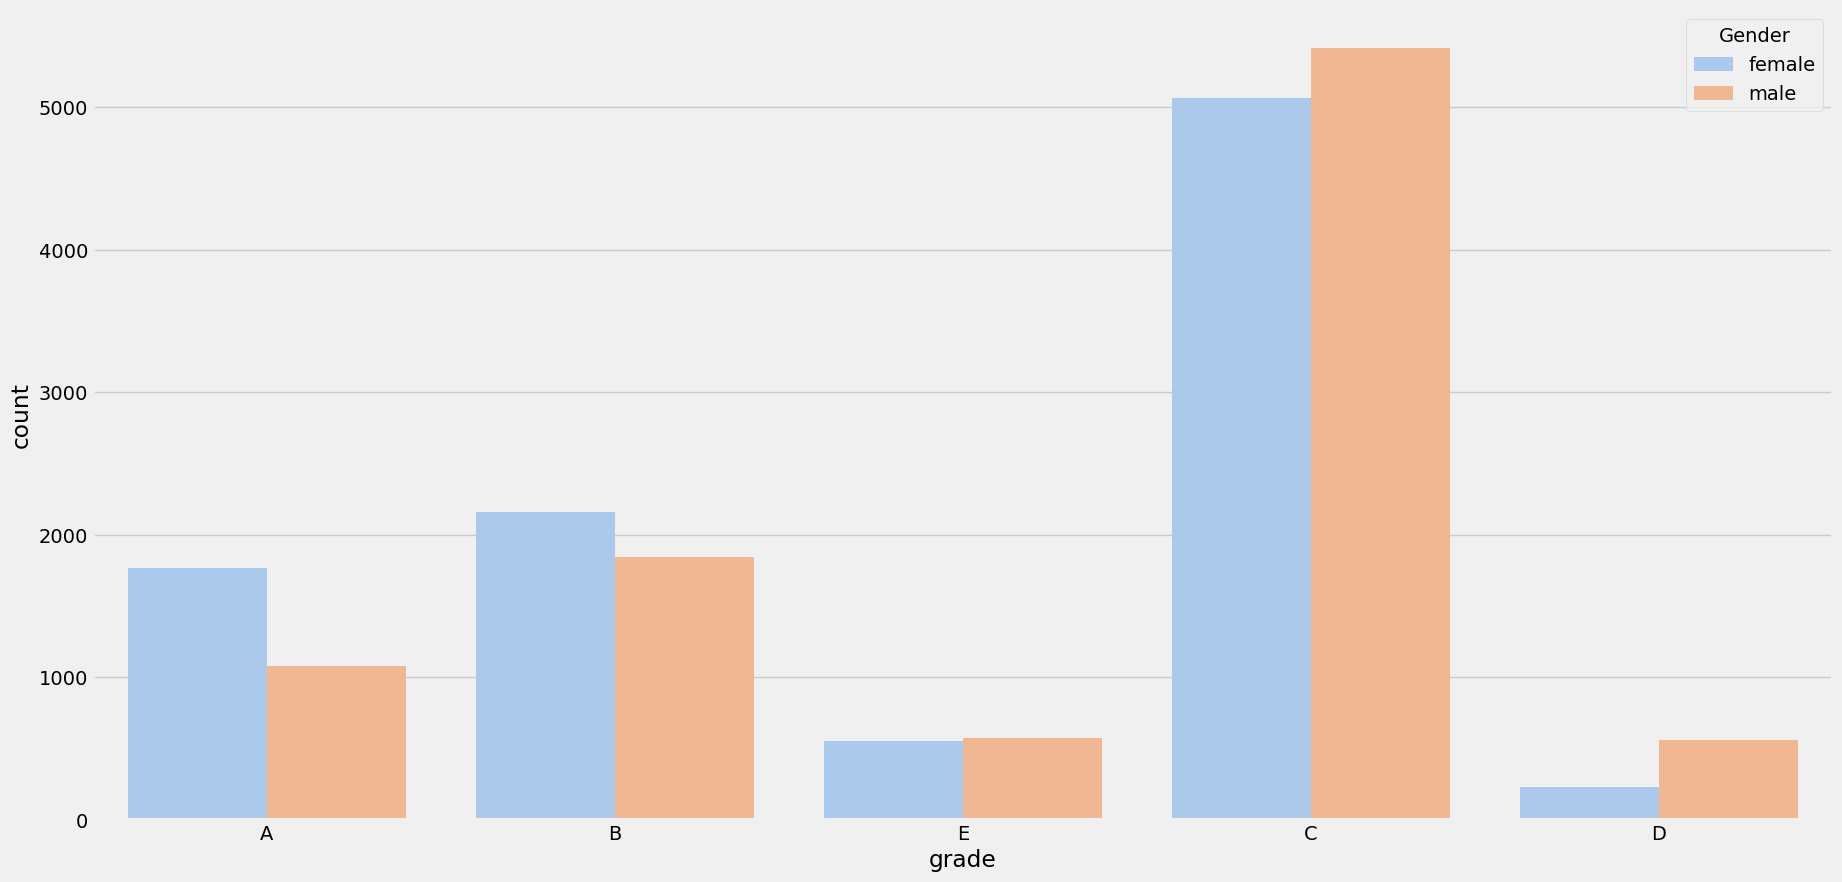

In [73]:
sns.countplot(x = df['grade'], data=df, hue = df['Gender'], palette = 'pastel')
plt.show()

**Conclusion**
- Maximum number of students that acheived Grade A and Grade B were Females

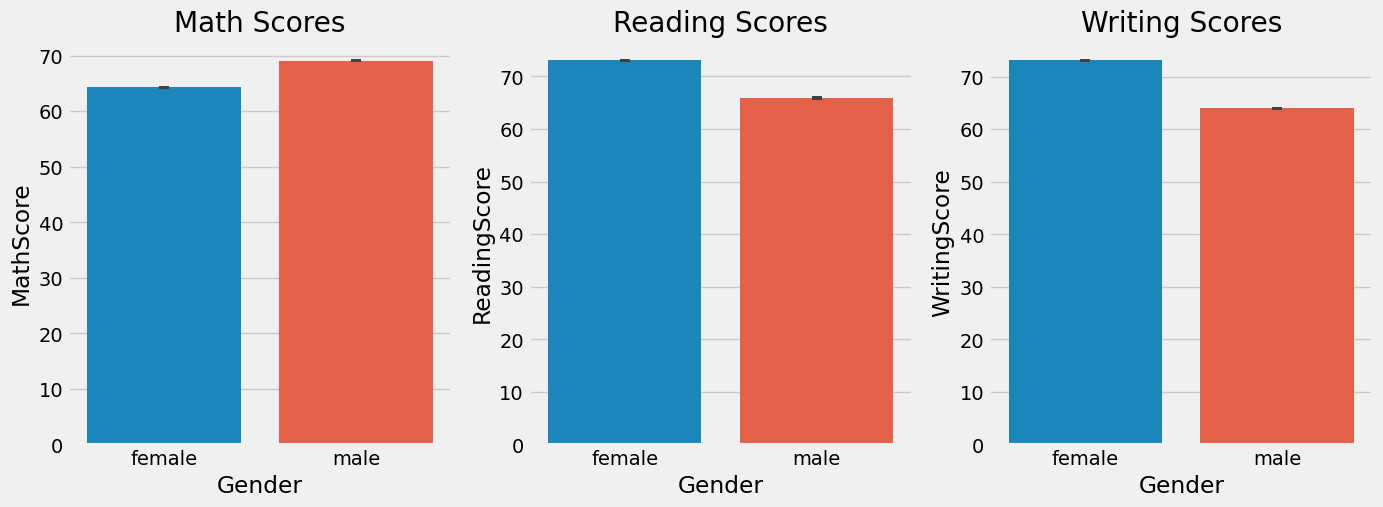

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="Gender", y="MathScore", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="Gender", y="ReadingScore", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="Gender", y="WritingScore", data=df)
plt.show()

**Conclusion: Male students scored higher in Maths whereas Female students scored higher in Reading and Writing**

# 2 Comparison between  Ethnicity and Grade acquired by student

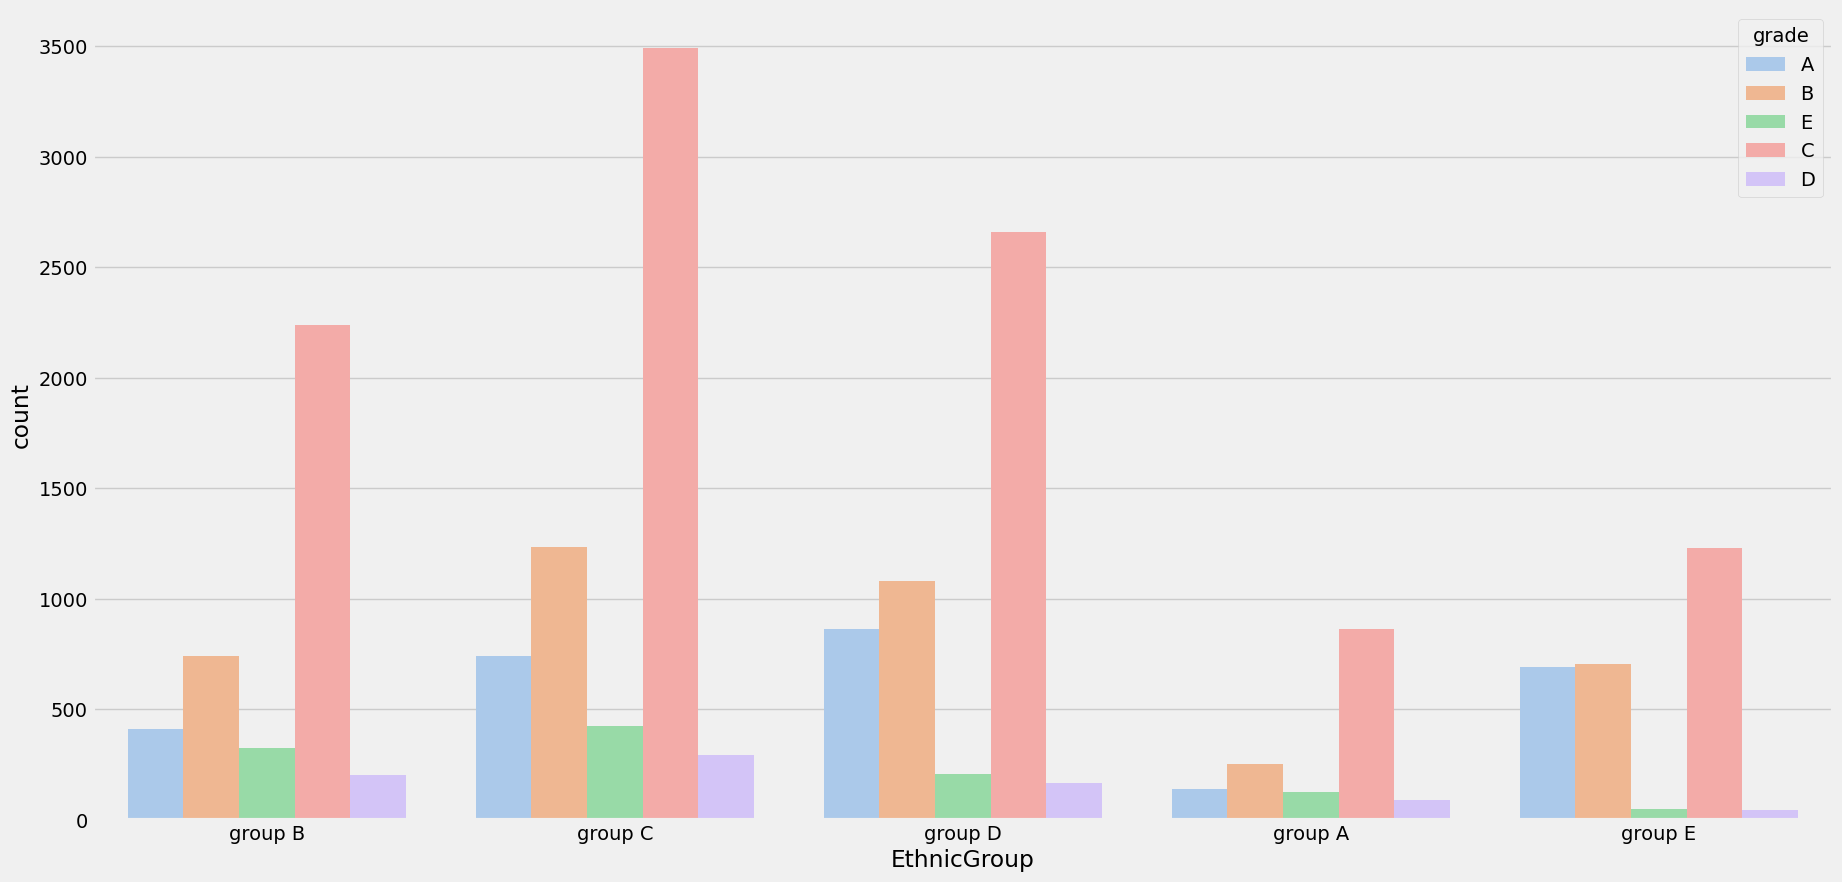

In [102]:
sns.countplot(x = df['EthnicGroup'], data=df, hue = df['grade'], palette = 'pastel')
plt.show()

**Conclusion: Maximum number of students that acheived high grades like Grade A and Grade B were from Group C and Group D**

# 3 Test Preparation Course taken score comparison in Male and Female

**a. Visual Analysis**

**Score wise check**

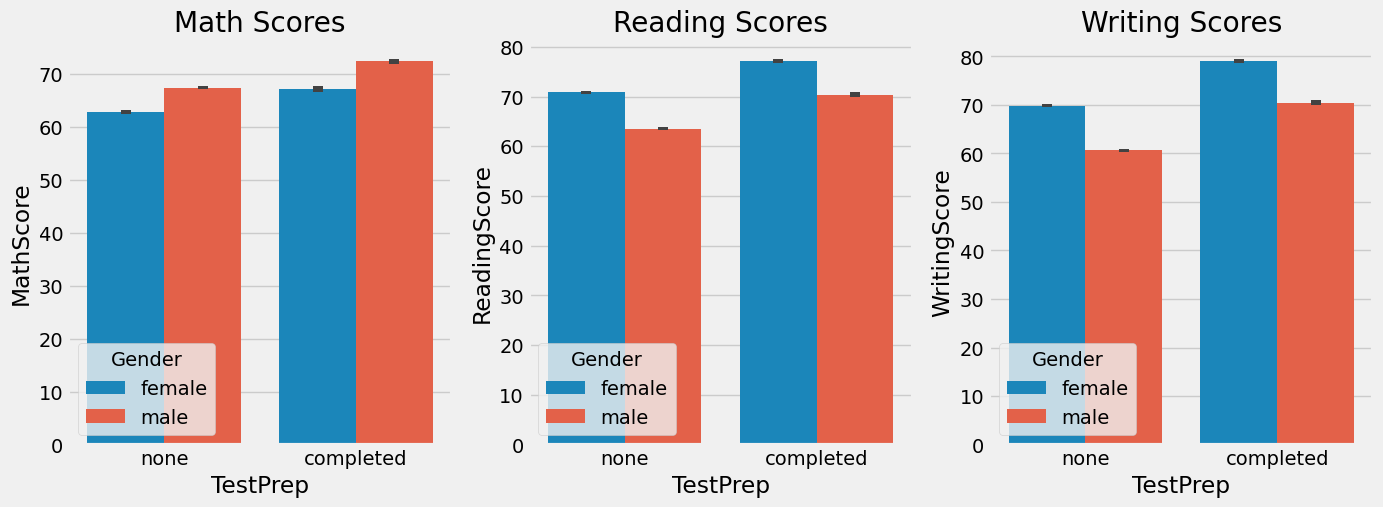

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="Gender", y="MathScore", x="TestPrep", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="Gender", y="ReadingScore", x="TestPrep", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="Gender", y="WritingScore", x="TestPrep", data=df)
plt.show()

**Conclusion Students who completed the test preparation course acheived higher scored in all 3 subject**

**Grade wise check**

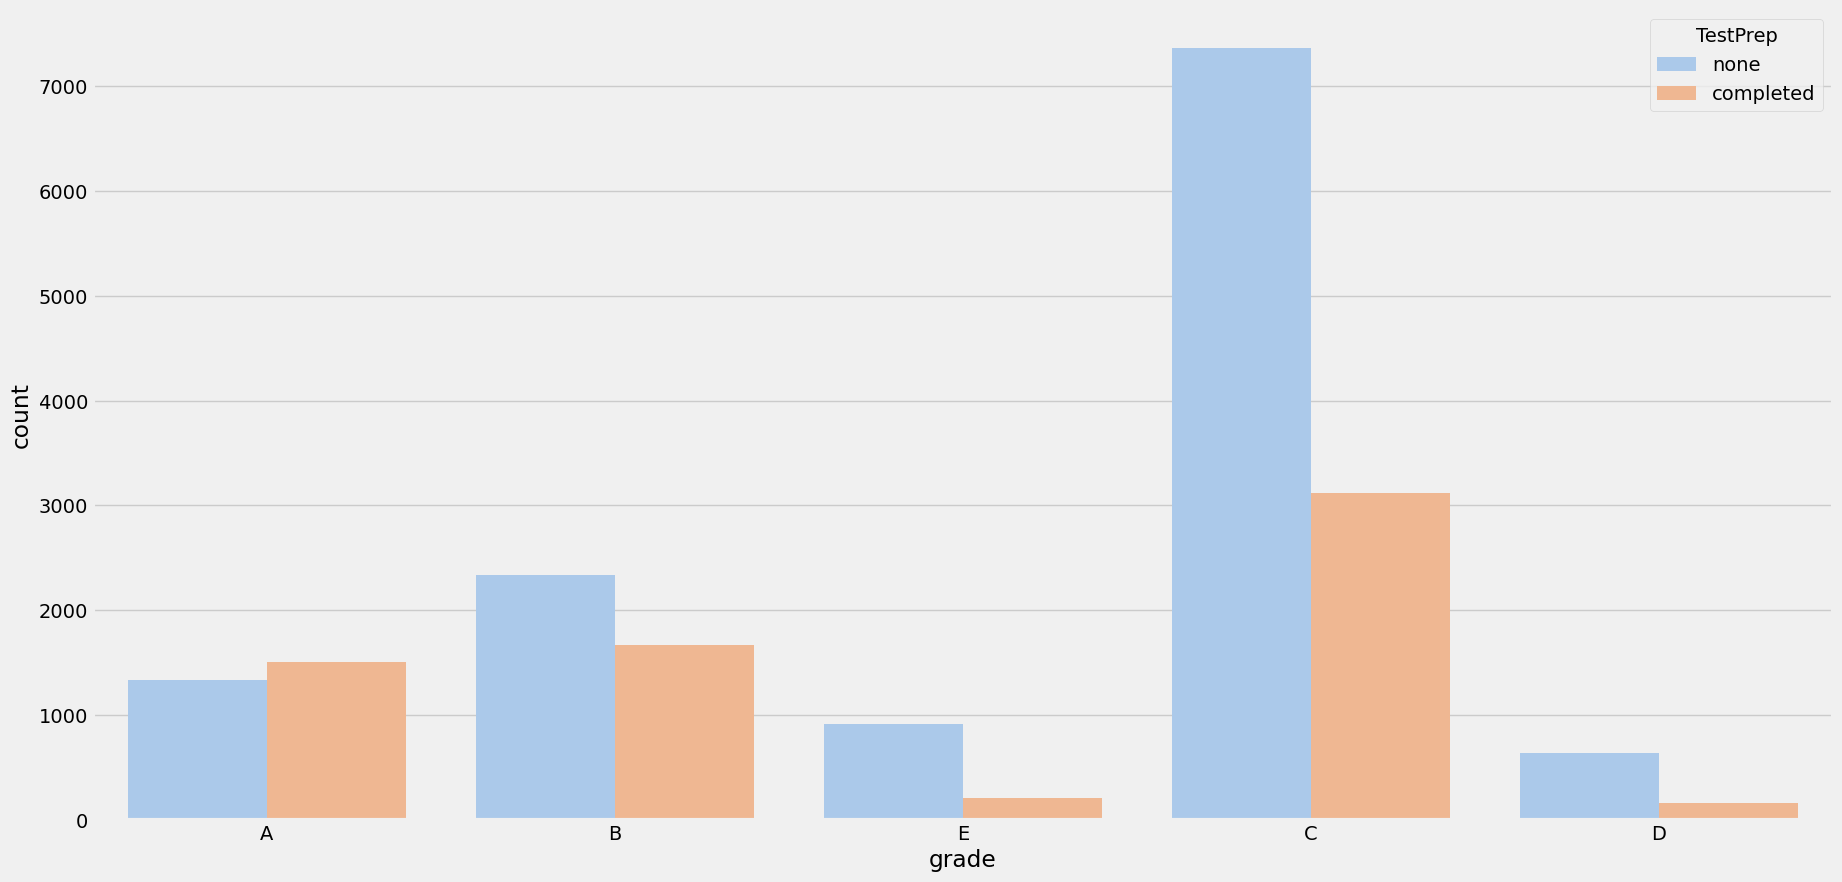

In [84]:
sns.countplot(x = df['grade'], data=df, hue = df['TestPrep'], palette = 'pastel')
plt.show()

**Number of students that completed the test preparation course and got Grade A were higher**

**b. Correlation Analysis**

In [85]:
gb1 = df.groupby("TestPrep").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb1)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed  69.649639     73.859826     74.862981
none       65.041630     67.247001     65.292524


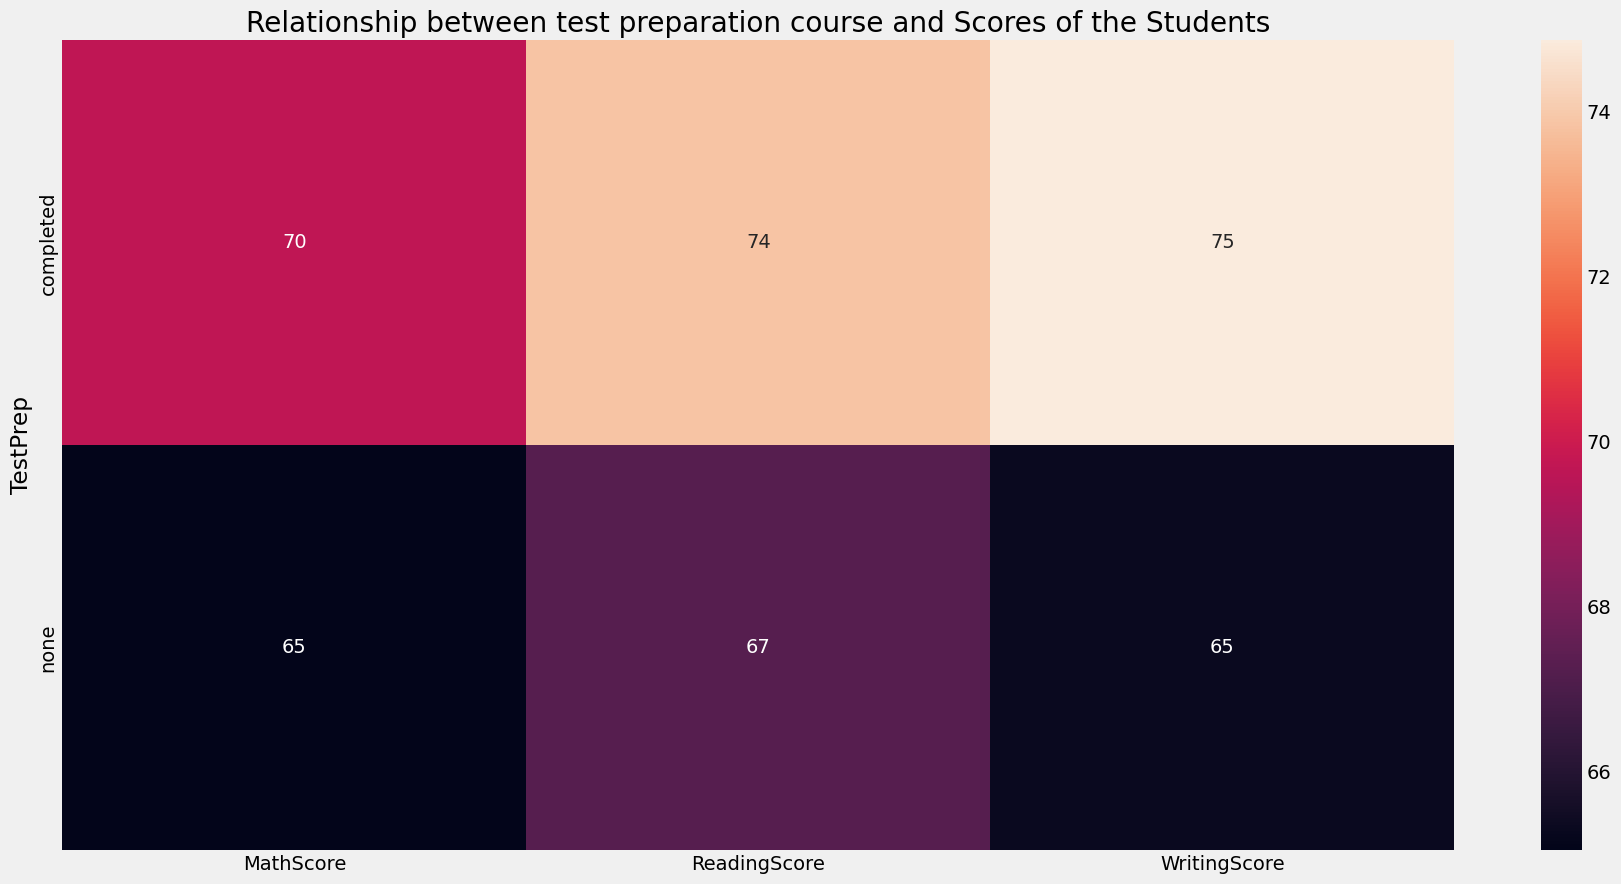

In [86]:
sns.heatmap(gb1, annot = True)
plt.title("Relationship between test preparation course and Scores of the Students")
plt.show()

**c. Hypothesis Testing**
- Null Hypothesis says that there is no relation between test preparation course and high total score



In [89]:
alc_tab1 = pd.crosstab(index=df.total_score, columns=df.TestPrep)
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.0

**since p value is 0 (less than 0.5) we reject null hypothesis and we can say there is  relation between test preparation course and high total score**

**Recommendation 1**

- **It is strongly recommended that enrollment in the test preparation course be made available to all students to maximize their scores in all three subjects. Higher academic success can be achieved by students through completion of this course.**

# 4 Lunch Type Scores Comparison

**a. Visual Analysis**

**Score wise**

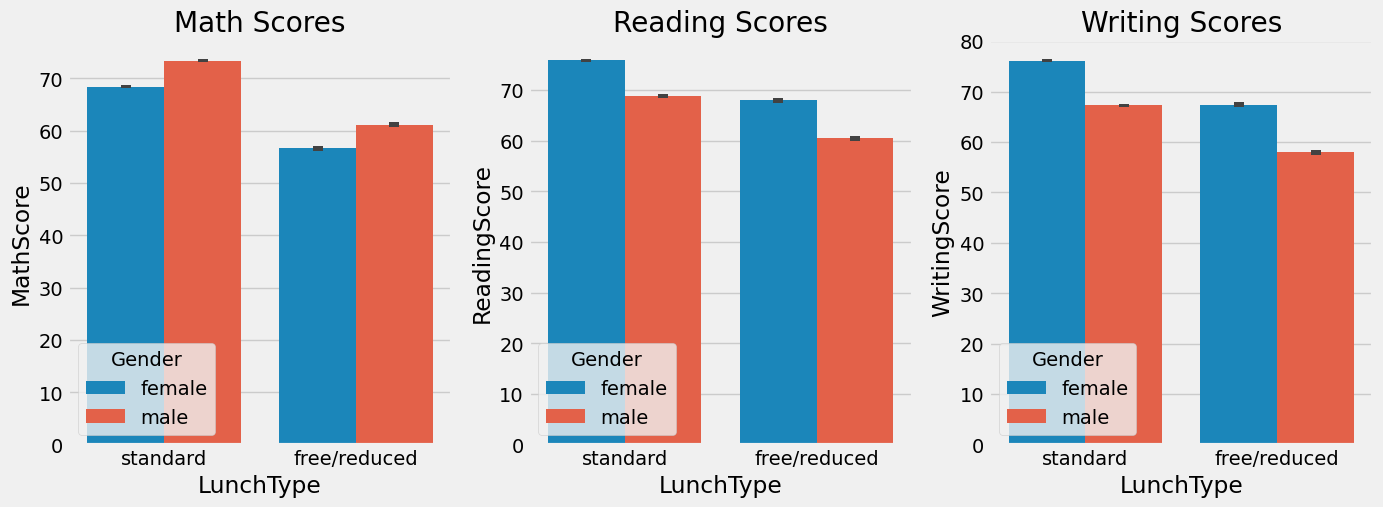

In [90]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="Gender", y="MathScore", x="LunchType", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="Gender", y="ReadingScore", x="LunchType", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="Gender", y="WritingScore", x="LunchType", data=df)
plt.show()

**Gradewise**

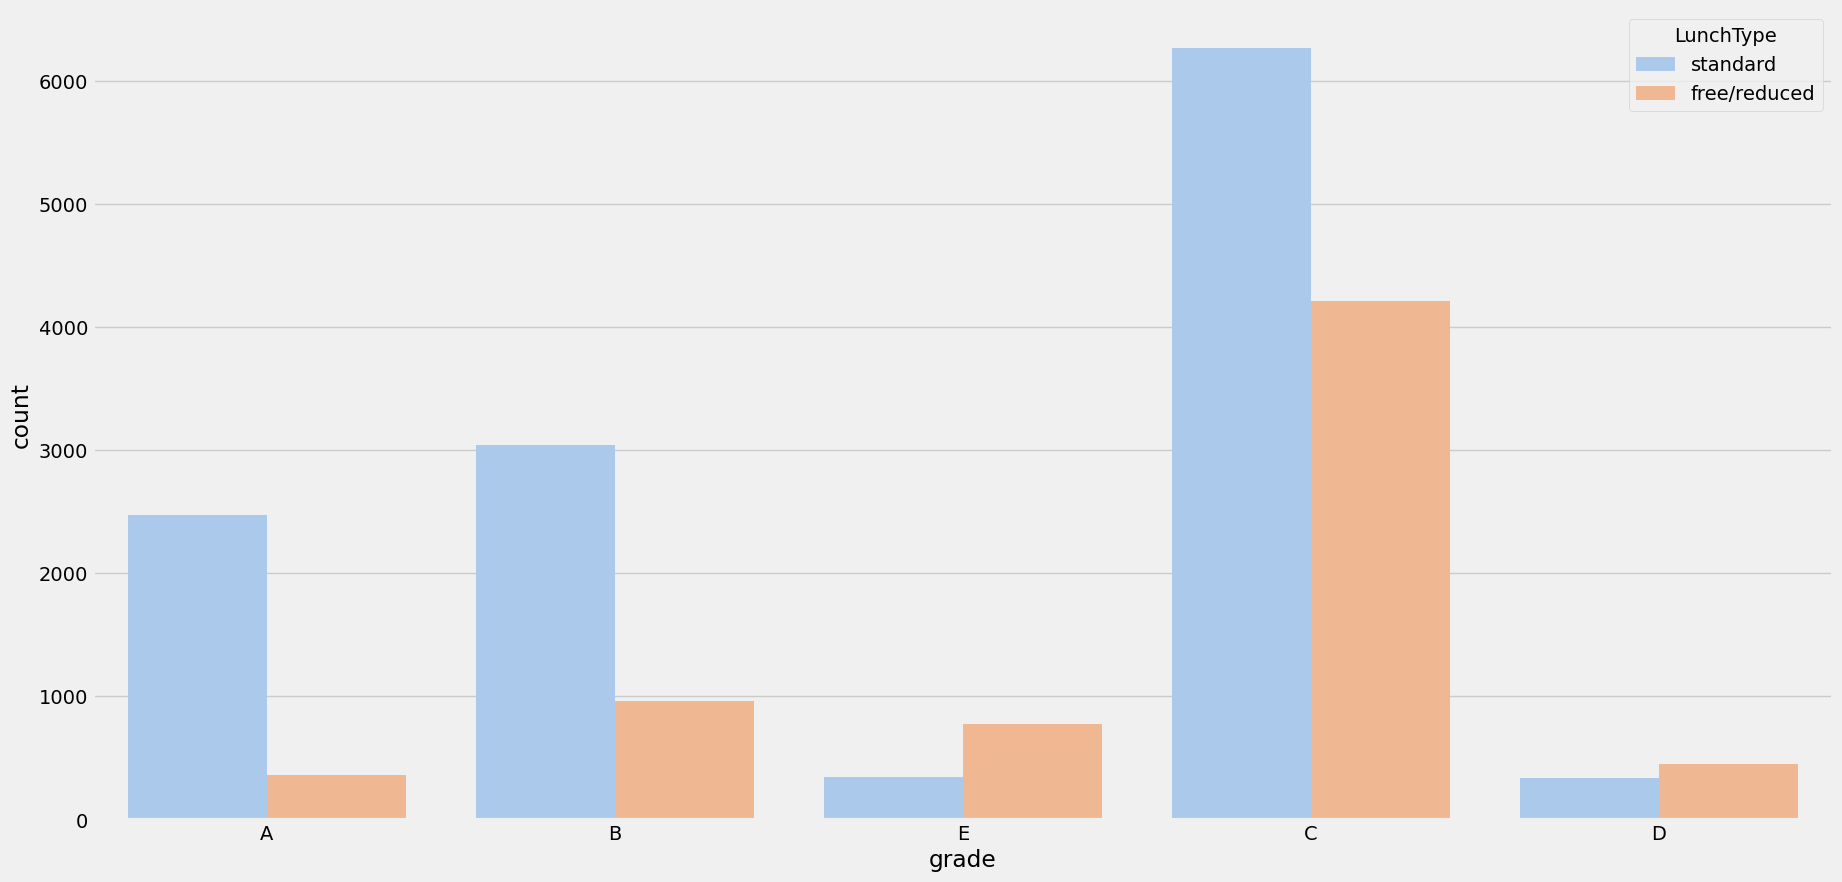

In [95]:
sns.countplot(x = df['grade'], data=df, hue = df['LunchType'], palette = 'pastel')
plt.show()

**Conclusion**

- Students who chose standard lunch acheived higher scored in all 3 subject

**Correlation Analysis**

In [97]:
gb2 = df.groupby("LunchType").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb2)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.859253     64.269680     62.750406
standard      70.857200     72.392479     71.780148


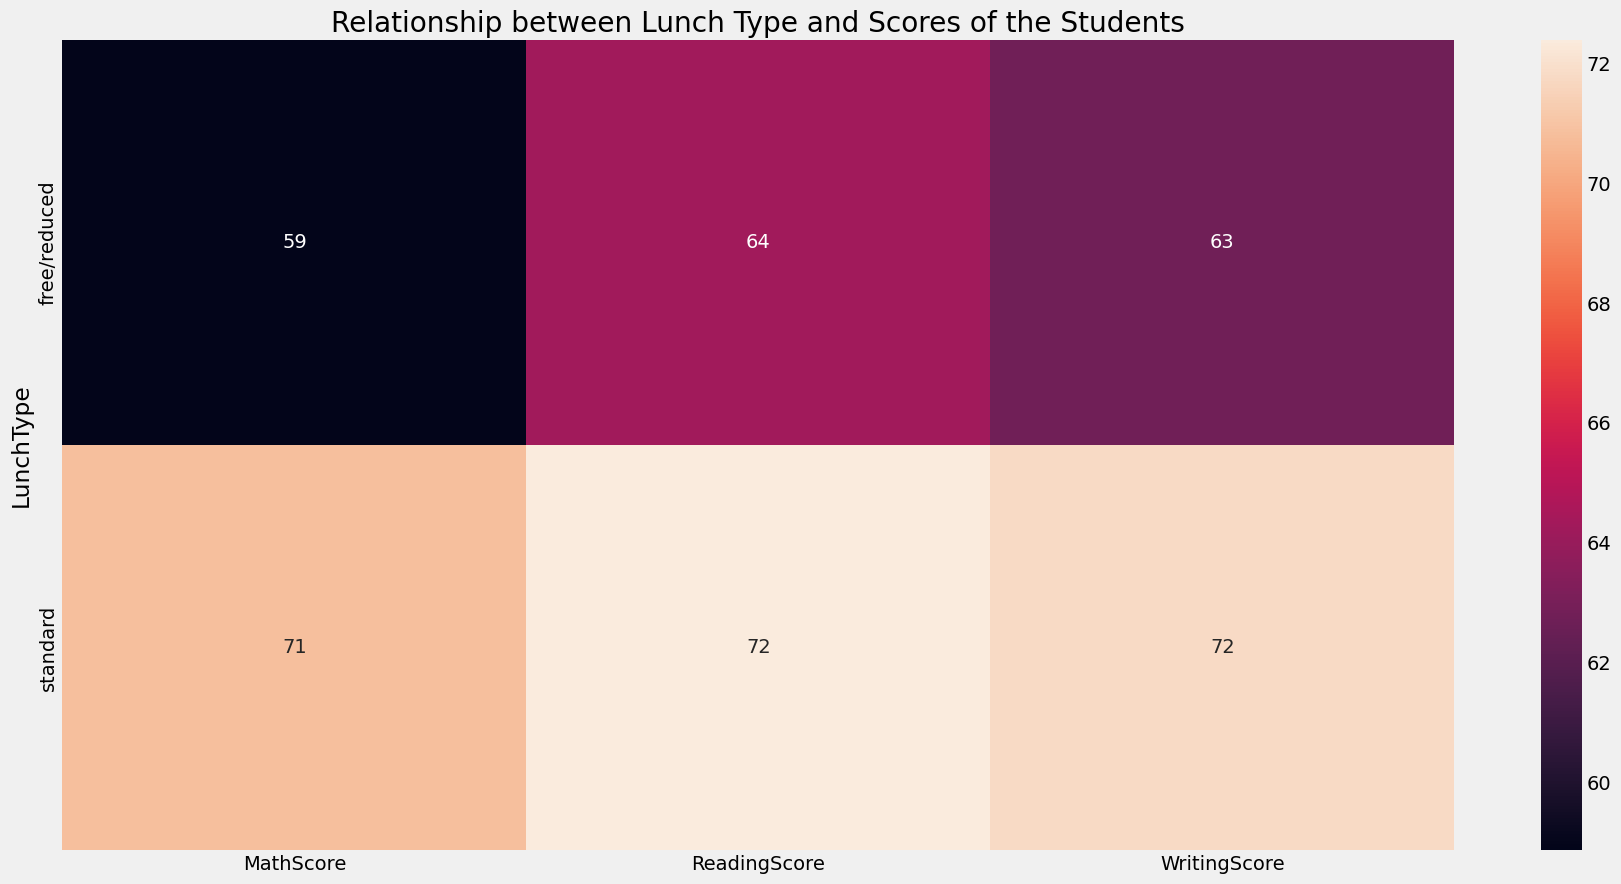

In [98]:
sns.heatmap(gb3, annot = True)
plt.title("Relationship between Lunch Type and Scores of the Students")
plt.show()

**Conclusion: From the above we can Conclude that, the students having Standered Lunch have scored exceptionally well compared to the students who have Free or Reduced lunch**

**Hypothesis Testing**

- The null hypothesis for the t-test is that there is no significant difference in the total_score between students who have standard lunch type and those who have free/reduced lunch type.

In [100]:
alc_tab2 = pd.crosstab(index=df.total_score, columns=df.LunchType)
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table2 = sm.stats.Table(alc_tab2)
alc_rslt2 = alc_table2.test_nominal_association()
alc_rslt2.pvalue

0.0

**since p value is 0 so we reject the null hypothesis and we can say that there is asignificant difference in the total_score between students who have standard lunch type and those who have free/reduced lunch type**

**Recommendation 2**

- **The standard lunch option should be encouraged for all students to potentially boost their academic performance across all three subjects.**

# 4 Comparison between parental level of education and grade acquired by student

In [103]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore', 'pass_math', 'pass_reading', 'pass_writing',
       'total_score', 'percentage', 'result', 'grade'],
      dtype='object')

**Visual Analysis**

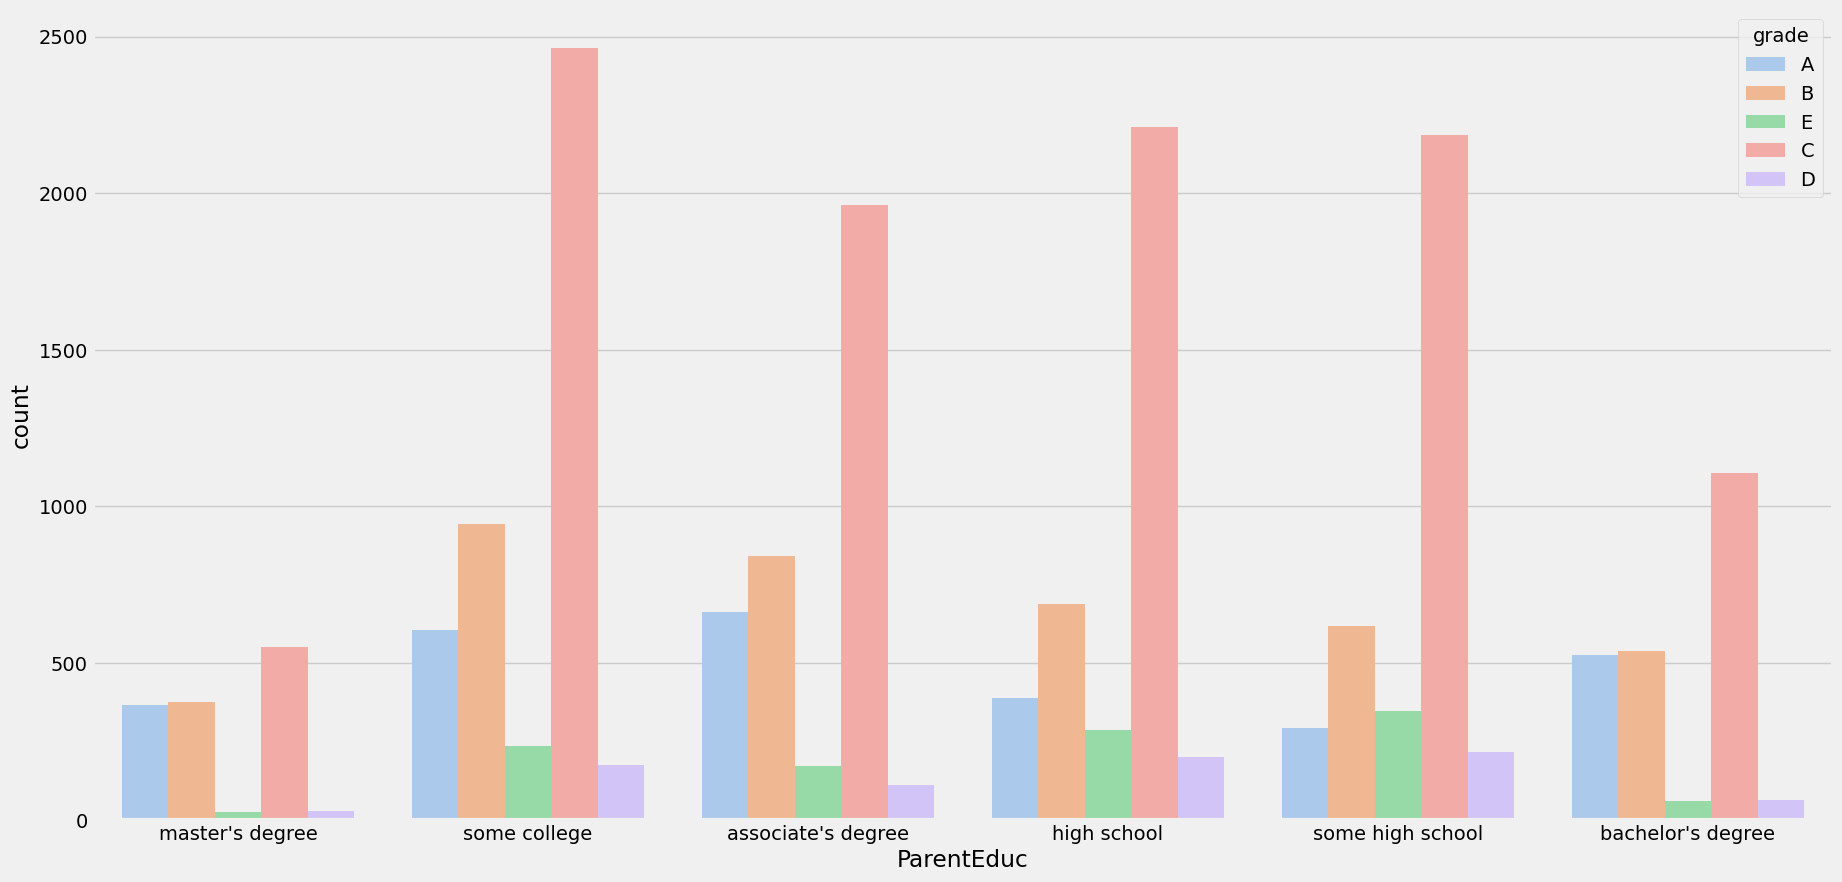

In [105]:
sns.countplot(x = df['ParentEduc'], data=df, hue = df['grade'], palette = 'pastel')
plt.show()

**Conclusion: Number of students whose parents had an associate's degree scored higher number of A grades than other students**

**Correlation Analysis**

In [108]:
gb3 = df.groupby("ParentEduc").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb3)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


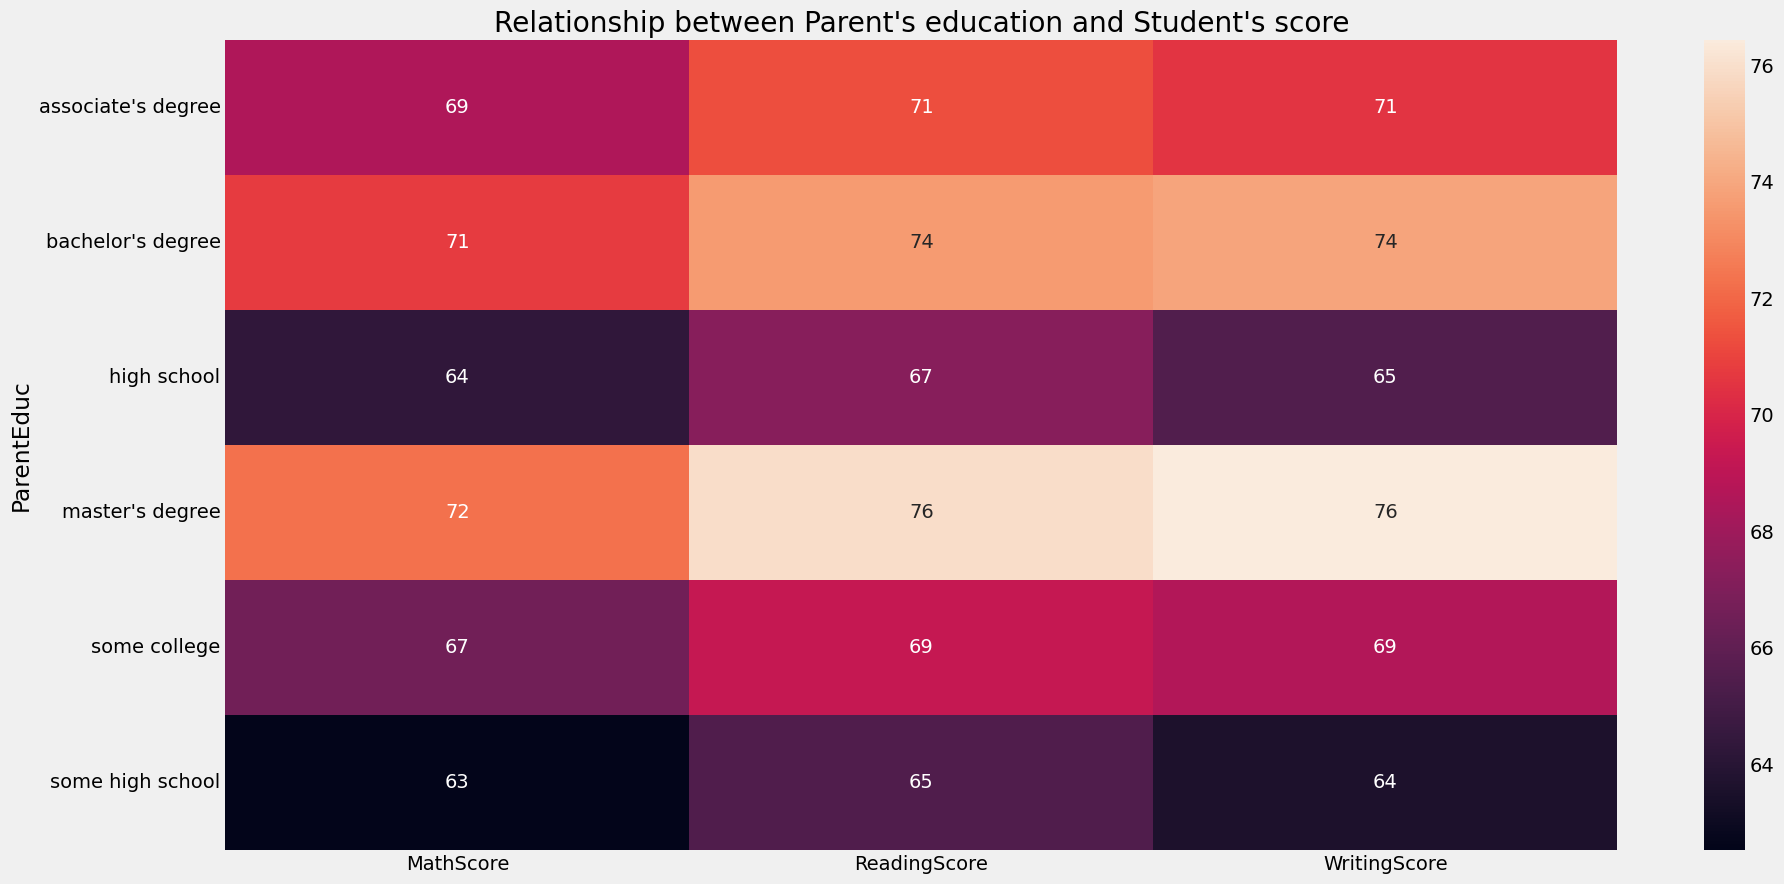

In [109]:
sns.heatmap(gb3, annot = True)
plt.title("Relationship between Parent's education and Student's score")
plt.show()

**Conclusion: from the above chart we can concludee that the higher education (associate, bachelors, masters degree)of parents  have a good impact on the scores of the children**

**Hypothesis Testing**
- chi-square test result -- significant!
 

In [110]:
alc_tab3 = pd.crosstab(index=df.total_score, columns=df.ParentEduc)
# chi-square test result -- significant!
 
alc_table3 = sm.stats.Table(alc_tab3)
alc_rslt3 = alc_table3.test_nominal_association()
alc_rslt3.pvalue

0.0

**0 p value shows Null Hypothesis is rejected and there is relation between parents education and score**

**Recommendation 3**

- **Parents and guardians with an associate's degree or higher should be encouraged to actively engage with their children's education to potentially enhance their academic performance**

# 5 Scores of Students Who Practice Sports

**Visual Analysis**

In [111]:
gb4 = df.groupby("PracticeSport").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb2)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.859253     64.269680     62.750406
standard      70.857200     72.392479     71.780148


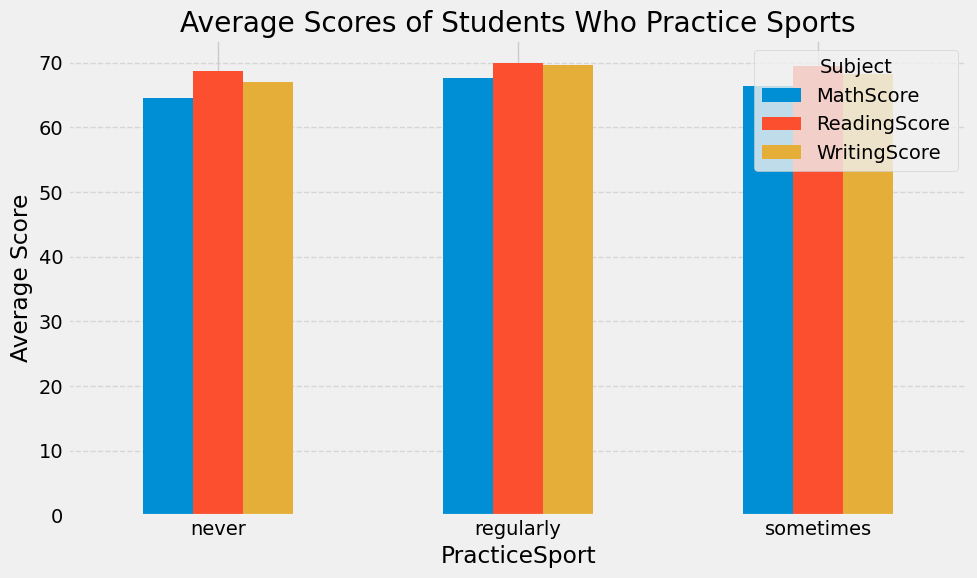

In [113]:
gb4.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores of Students Who Practice Sports')
plt.xlabel('PracticeSport')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Conclusion: From the above charts we can conclude that The students who Practice Sports regularly have good score overall compared to the students who never practice sports regularly.**

**Correlation Analysis**

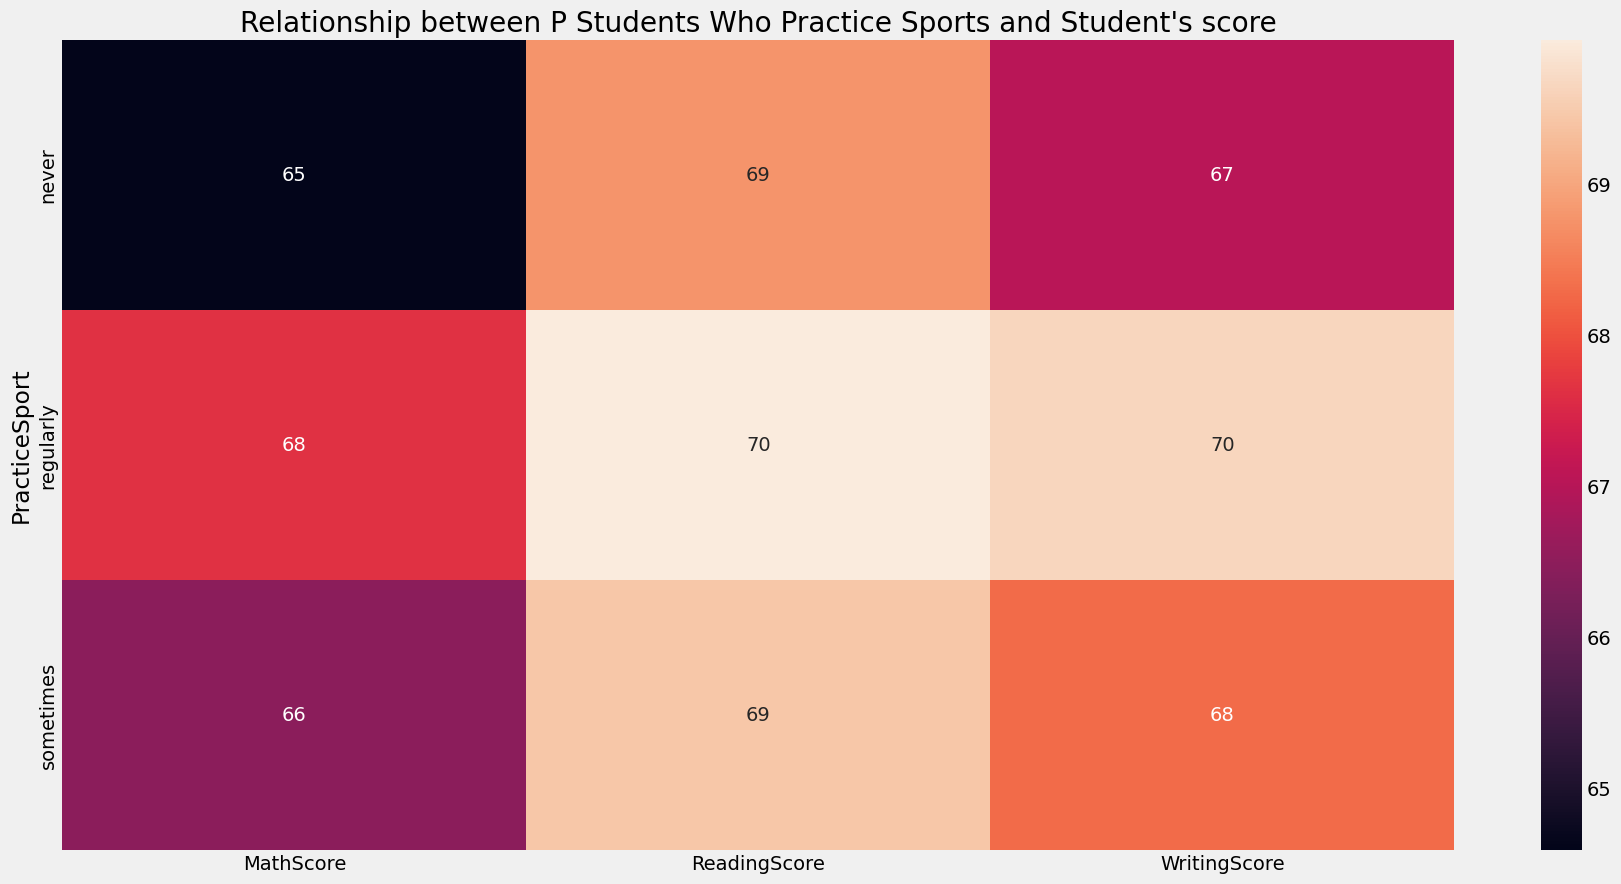

In [115]:
sns.heatmap(gb4, annot = True)
plt.title("Relationship between P Students Who Practice Sports and Student's score")
plt.show()

**from the above chart we have concluded that the sudents who practice sports regularly have a good impact on the scores childrens**

**Hypothesis Testing**

In [116]:
alc_tab4 = pd.crosstab(index=df.total_score, columns=df.PracticeSport)
# chi-square test result -- significant!
 
alc_table4 = sm.stats.Table(alc_tab4)
alc_rslt4 = alc_table4.test_nominal_association()
alc_rslt4.pvalue

0.04119883192782137

**p value lower than 0.05 showsthat Null Hypothesis is rejected and there is relation between practice sports regularly and score**

**Recommendation 4**

- **Regular sports practice should be actively encouraged and integrated into students' schedules, as it has a positive impact on their academic performance.** 

# 6 Average Weekly Study Hours and Students' Performance (score)

<AxesSubplot:xlabel='WklyStudyHours', ylabel='total_score'>

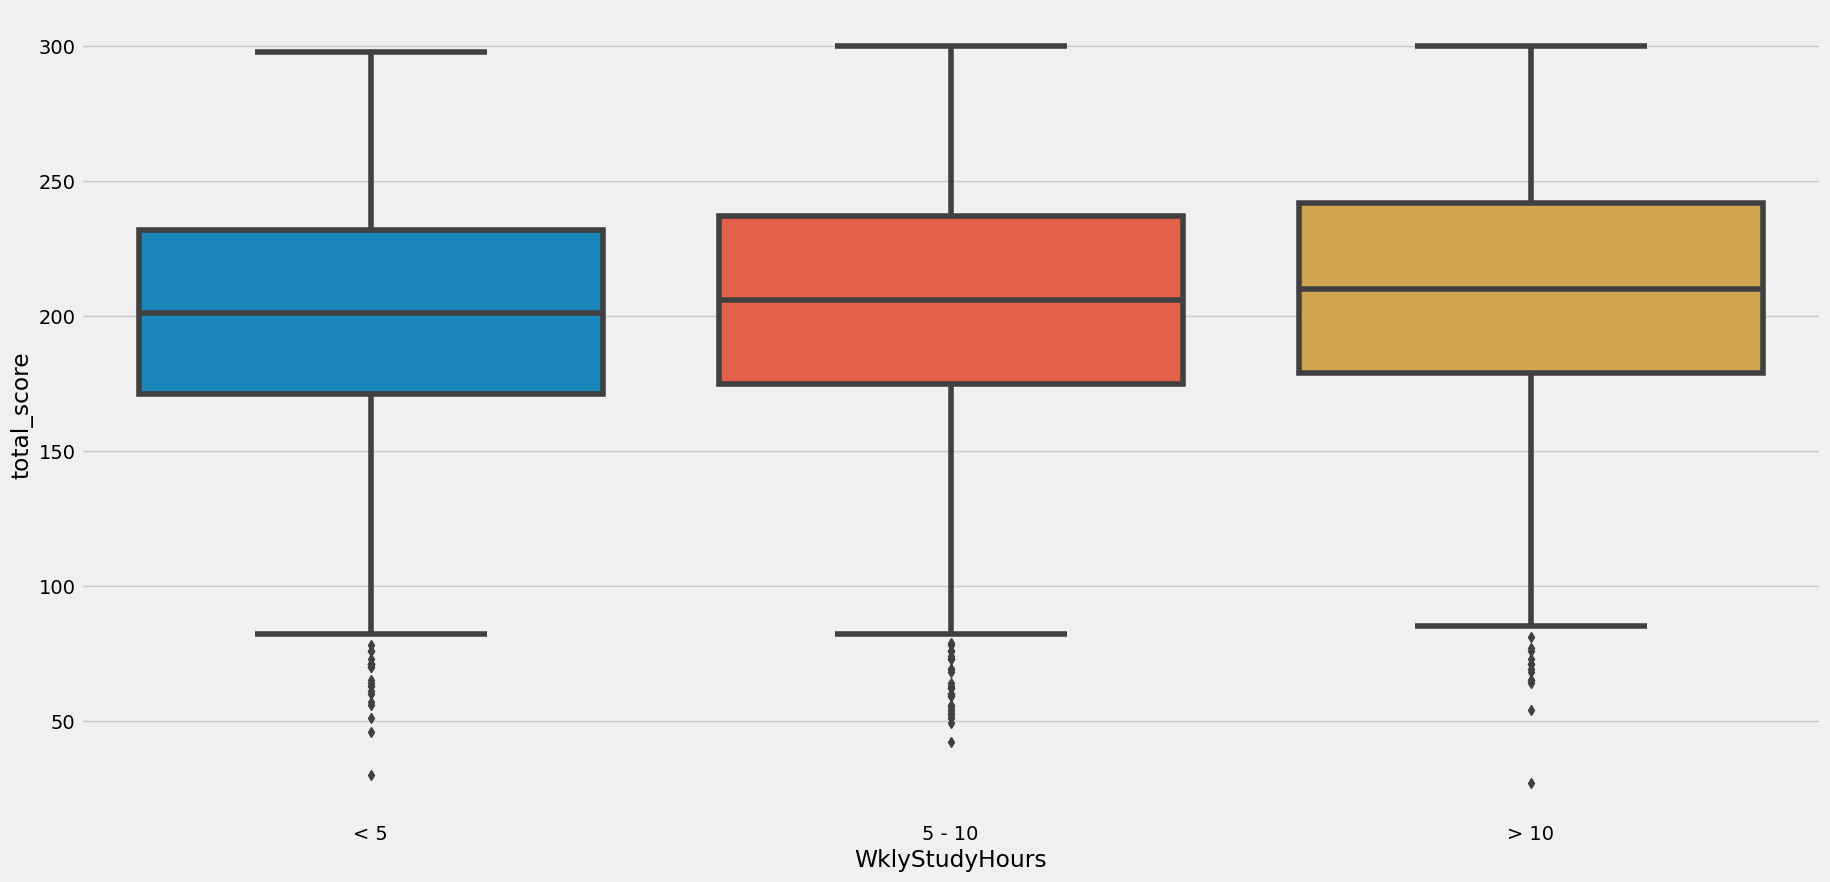

In [118]:
sns.boxplot(x='WklyStudyHours',y='total_score',data=df)

**From above chart it is clear that students who study more (5 to 10 hours) get high score**

**Correlation Analysis**

In [121]:
gb5 = df.groupby("WklyStudyHours").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb5)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.957425     69.775598     68.793123
< 5             64.605650     68.431518     67.359227
> 10            68.878382     70.545644     69.998811


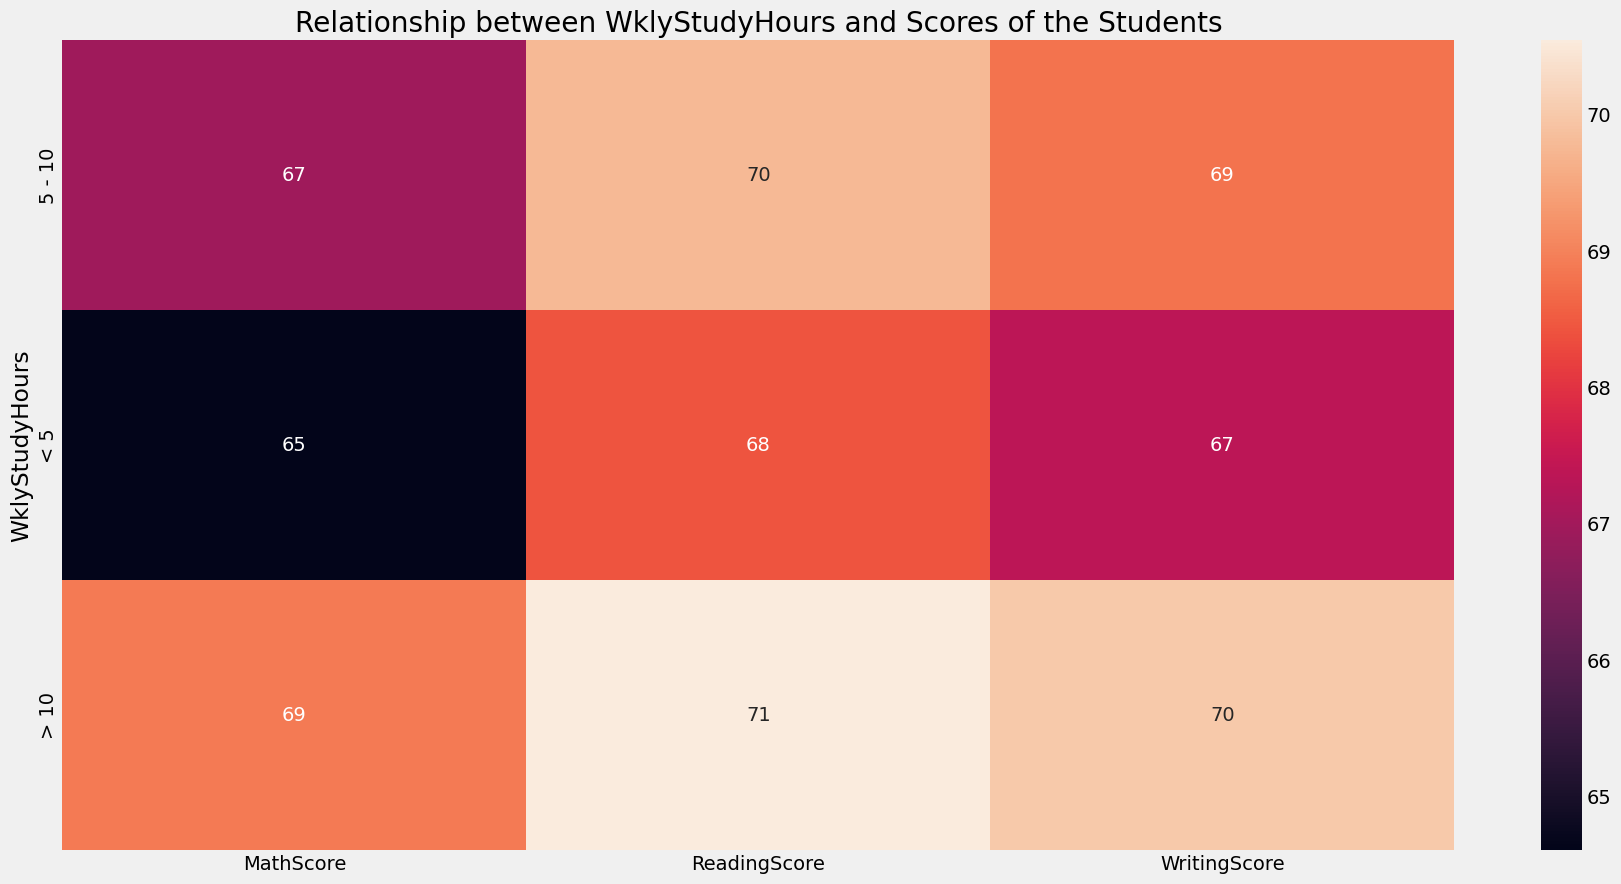

In [122]:

sns.heatmap(gb5, annot = True)
plt.title("Relationship between WklyStudyHours and Scores of the Students")
plt.show()

**Hypothesis Testing**

By binning the data, we reduce the number of categories and increase the sample size within each category, which  make the association more significant.

In [134]:
df['total_score_bin'] = pd.cut(df['total_score'], bins=[0, 100, 200, 300], labels=['0-100', '101-200', '201-300'])

In [135]:

alc_tab5 = pd.crosstab(index=df.total_score_bin, columns=df.WklyStudyHours)
alc_table5 = sm.stats.Table(alc_tab5)
alc_rslt5 = alc_table5.test_nominal_association()
print("p-value:", alc_rslt5.pvalue)

p-value: 1.5154544286133387e-12


**p value lower than 0.05 shows that Null Hypothesis is rejected and which means that which shows the association between total_score and WklyStudyHours is highly statistically significant.**

- **In fact, the p-value is so small that it's essentially zero, indicating that the null hypothesis can be rejected with a high degree of confidence.**
- **This suggests that there is a strong association between the amount of time spent studying and the total score achieved. Students who study more tend to achieve higher scores**

**Recommendation 5**

- **Students should be advised to allocate additional time for studying and reviewing course materials to maximize their academic potential. By increasing study time, students can significantly improve their results and achieve higher grades.**

In [137]:
df.columns


Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore', 'pass_math', 'pass_reading', 'pass_writing',
       'total_score', 'percentage', 'result', 'grade', 'total_score_bin'],
      dtype='object')

# Remaining columns Relation with Total Score

# ParentMaritalStatus

<AxesSubplot:xlabel='ParentMaritalStatus', ylabel='total_score'>

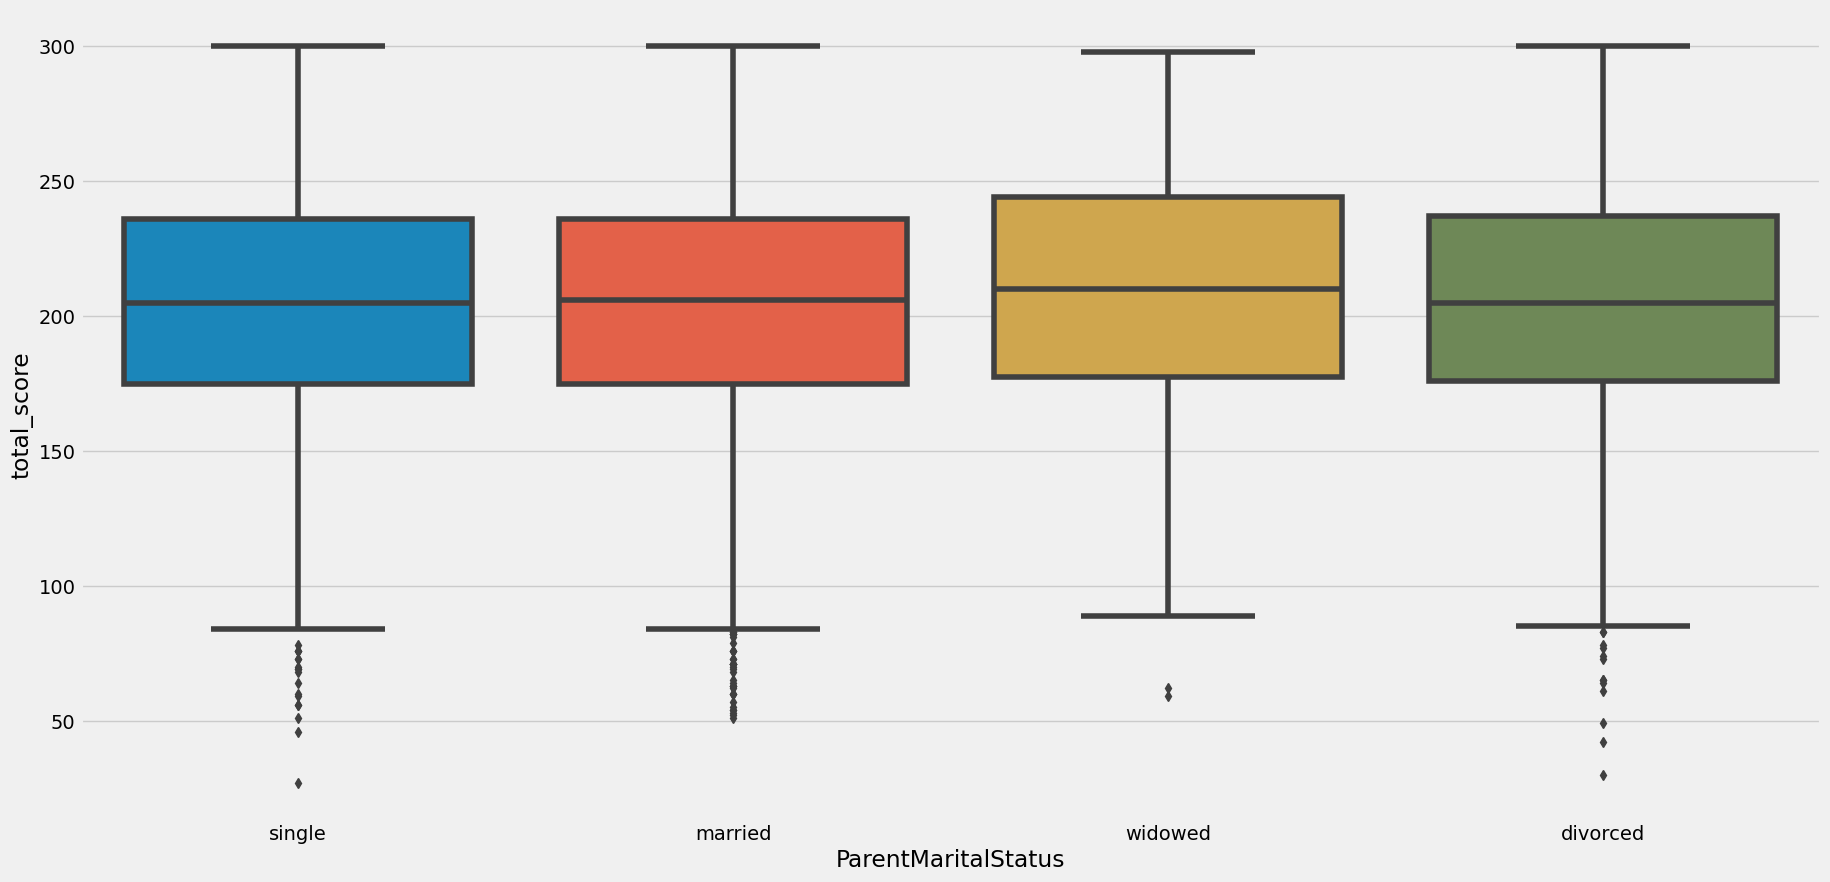

In [140]:
sns.boxplot(x='ParentMaritalStatus', y='total_score', data=df)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


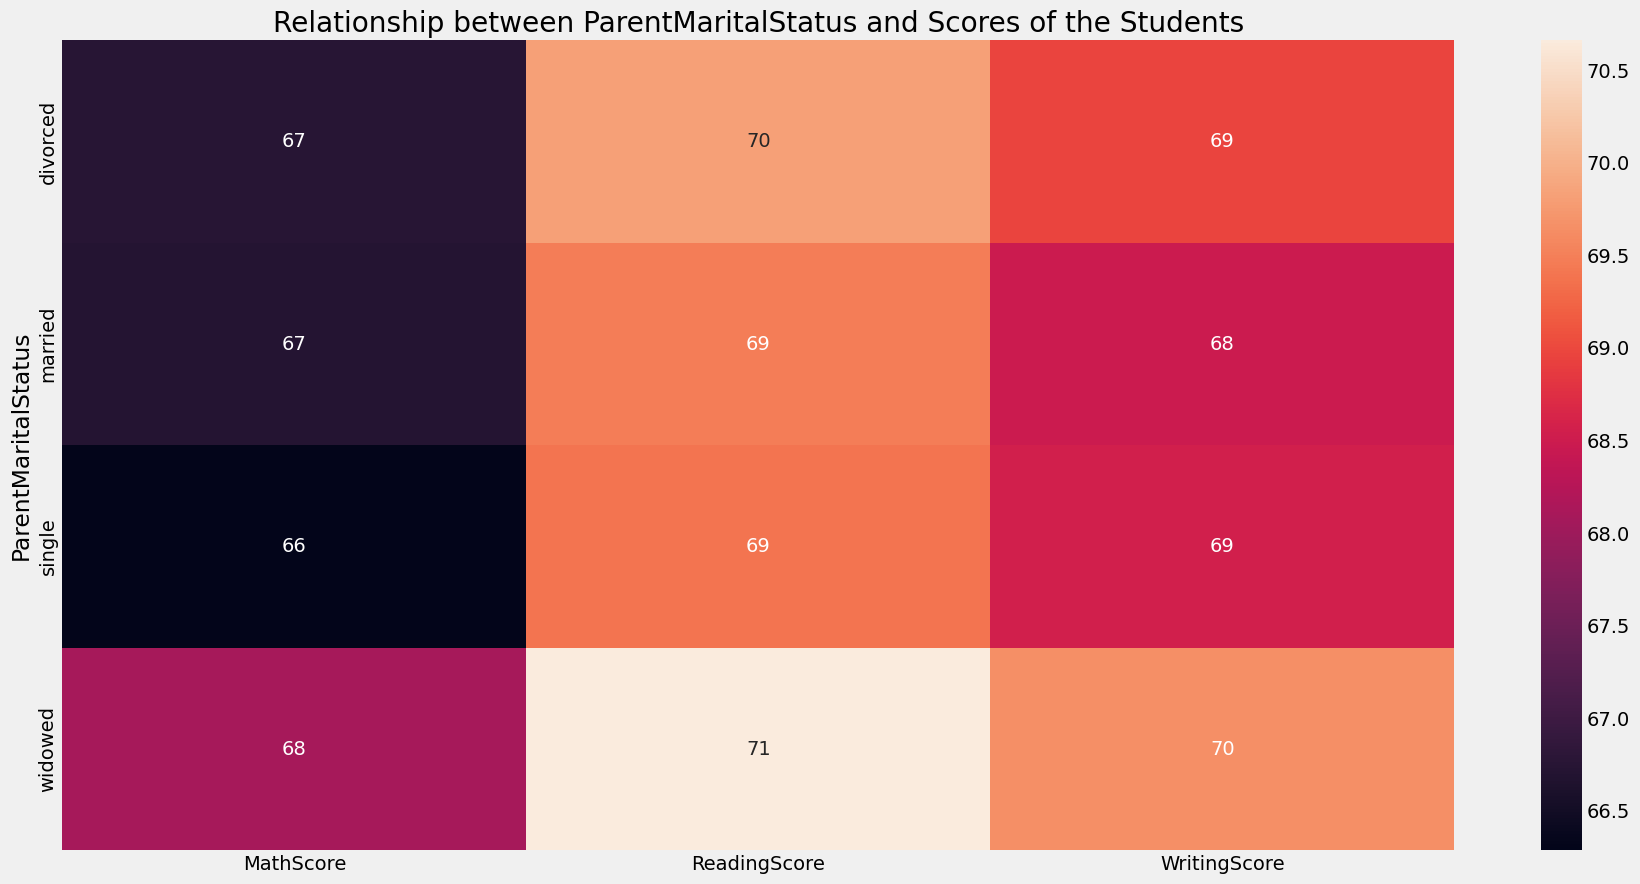

In [141]:
gb = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb)
sns.heatmap(gb, annot=True)
plt.title("Relationship between ParentMaritalStatus and Scores of the Students")
plt.show()

In [142]:
alc_tab = pd.crosstab(index=df.total_score_bin, columns=df.ParentMaritalStatus)
alc_table = sm.stats.Table(alc_tab)
alc_rslt = alc_table.test_nominal_association()
print("p-value:", alc_rslt.pvalue)

p-value: 0.5631844738566476


**No relation of ParentMaritalStatus with total_score**

# IsFirstChild

<AxesSubplot:xlabel='IsFirstChild', ylabel='total_score'>

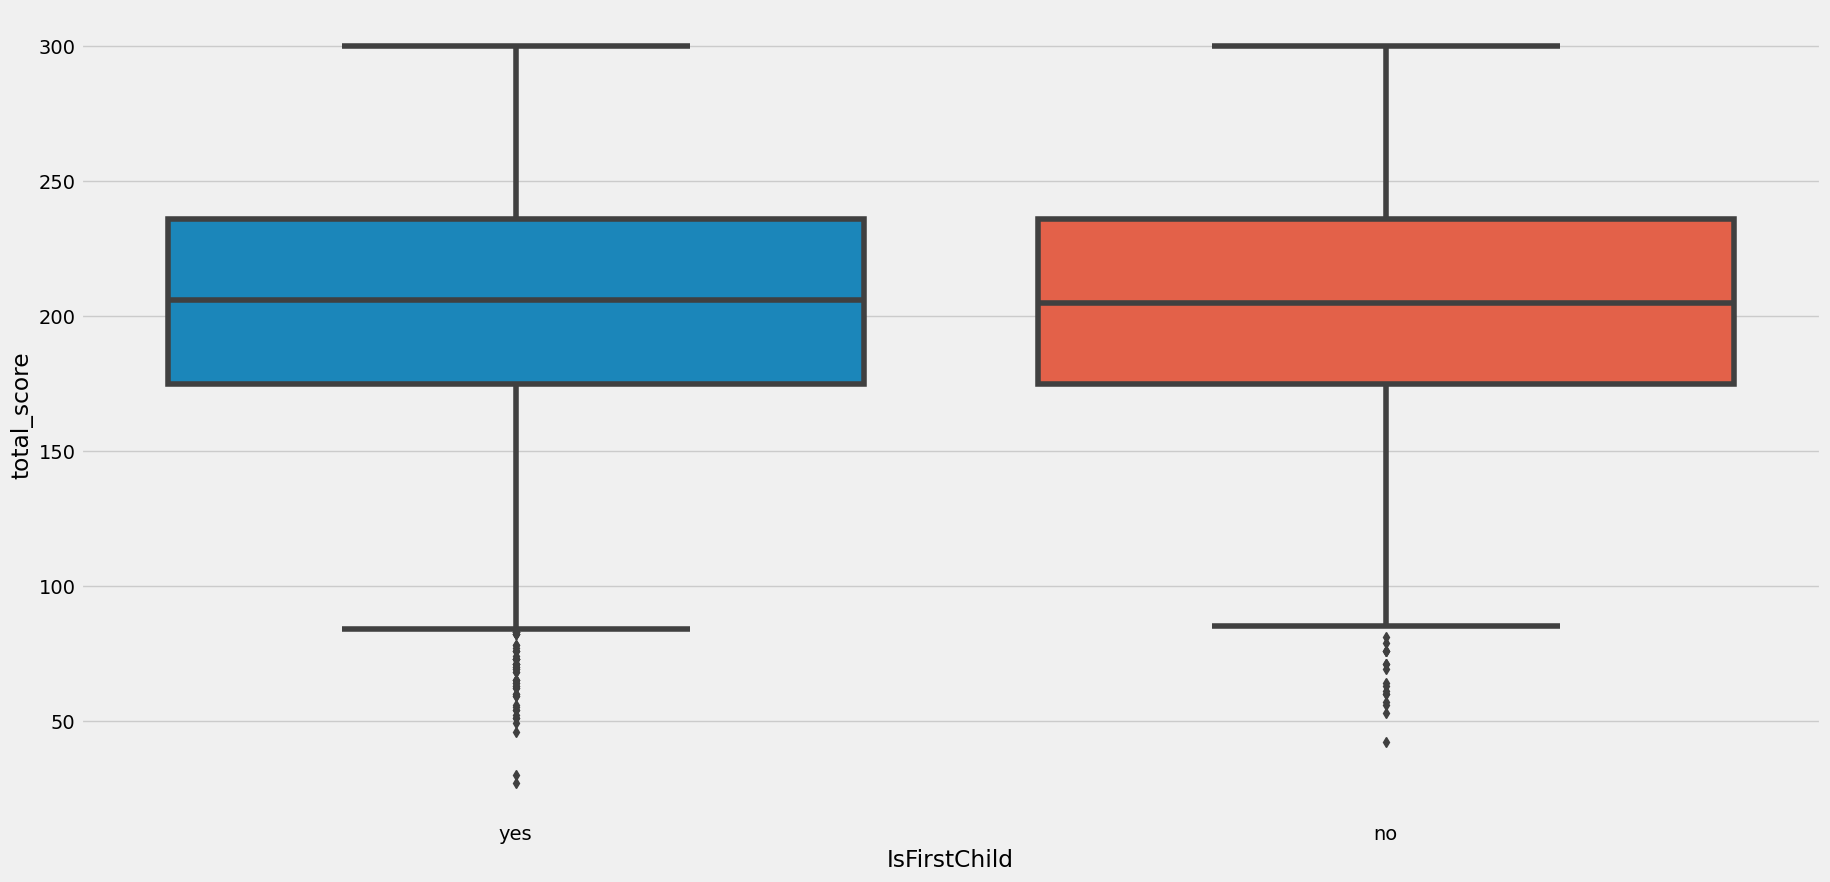

In [143]:
sns.boxplot(x='IsFirstChild', y='total_score', data=df)

**No relation of IsFirshChild with total_score**

# Number of Siblings

<AxesSubplot:xlabel='NrSiblings', ylabel='total_score'>

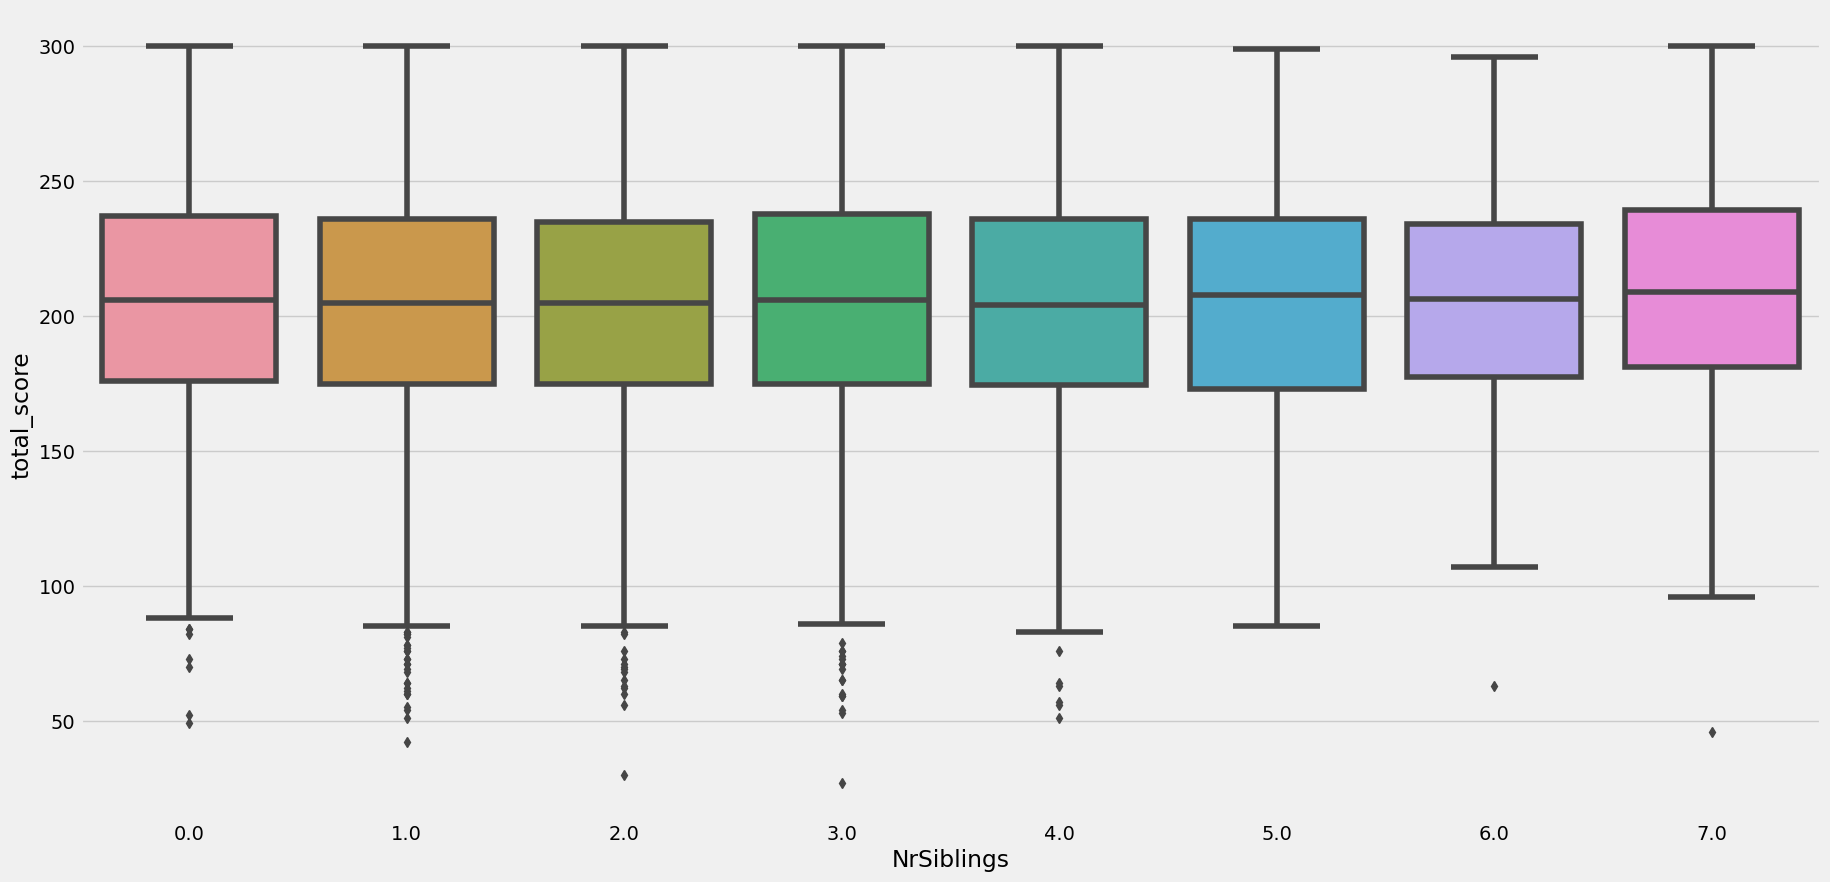

In [144]:
sns.boxplot(x='NrSiblings', y='total_score', data=df)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.789262     69.845961     68.961867
1.0         66.579434     69.409839     68.416127
2.0         66.472631     69.433282     68.486041
3.0         66.800097     69.620039     68.787996
4.0         66.356665     69.433865     68.502831
5.0         66.940211     69.702227     68.583822
6.0         67.568182     69.170455     68.301136
7.0         67.557895     70.973684     70.310526


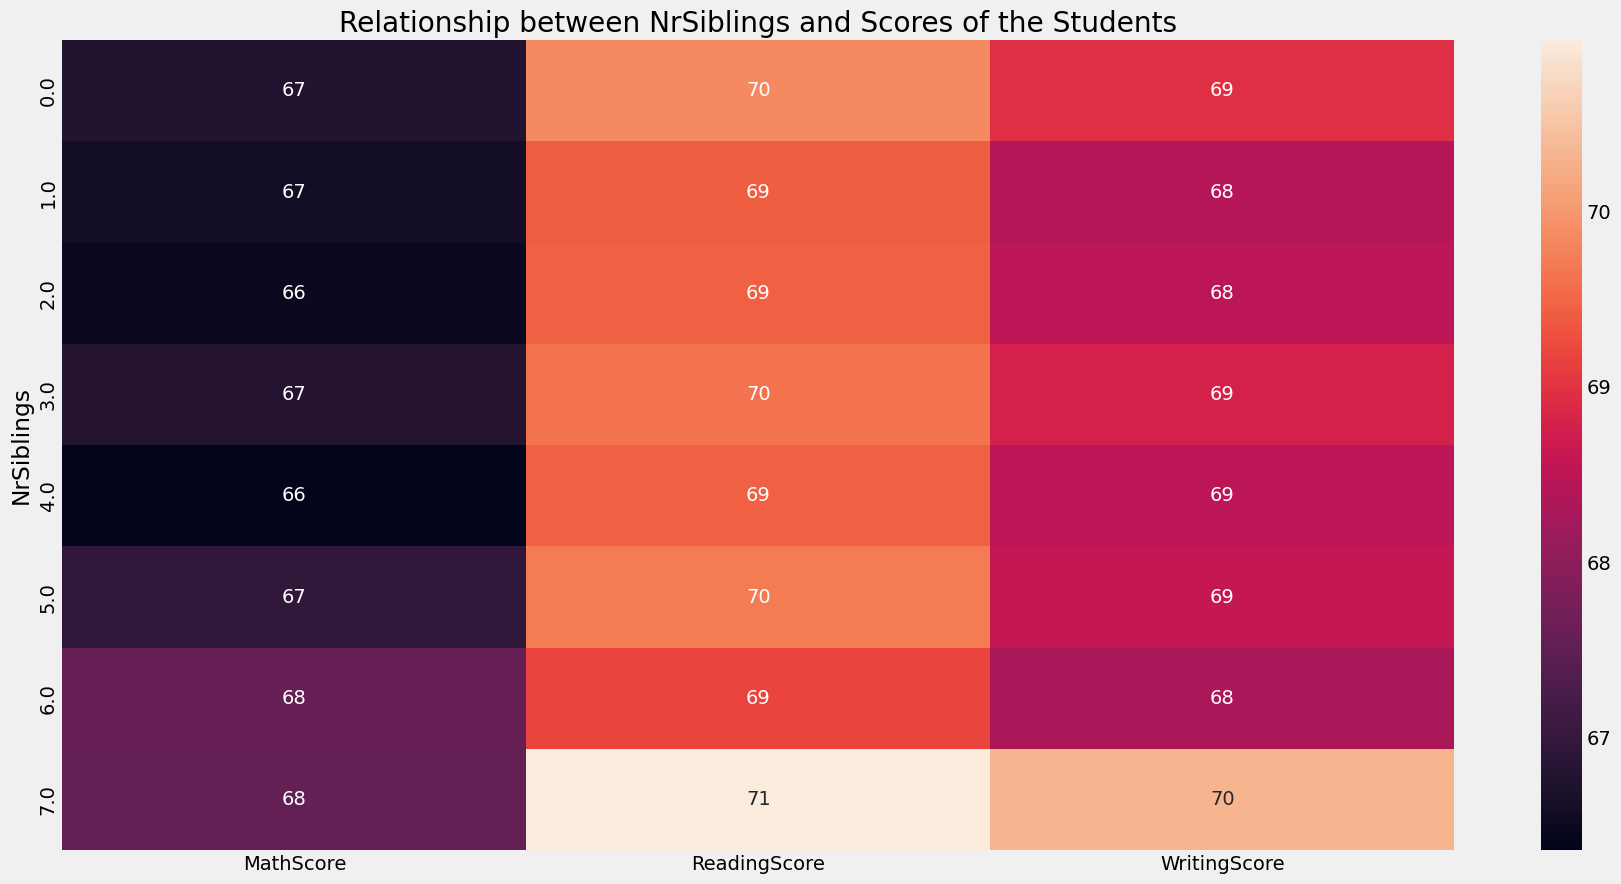

In [145]:
gb = df.groupby("NrSiblings").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb)
sns.heatmap(gb, annot=True)
plt.title("Relationship between NrSiblings and Scores of the Students")
plt.show()

In [146]:
alc_tab = pd.crosstab(index=df.total_score_bin, columns=df.NrSiblings)
alc_table = sm.stats.Table(alc_tab)
alc_rslt = alc_table.test_nominal_association()
print("p-value:", alc_rslt.pvalue)

p-value: 0.527546763268264


**No relation of NrSiblings with total_score**

# Transport Means

<AxesSubplot:xlabel='TransportMeans', ylabel='total_score'>

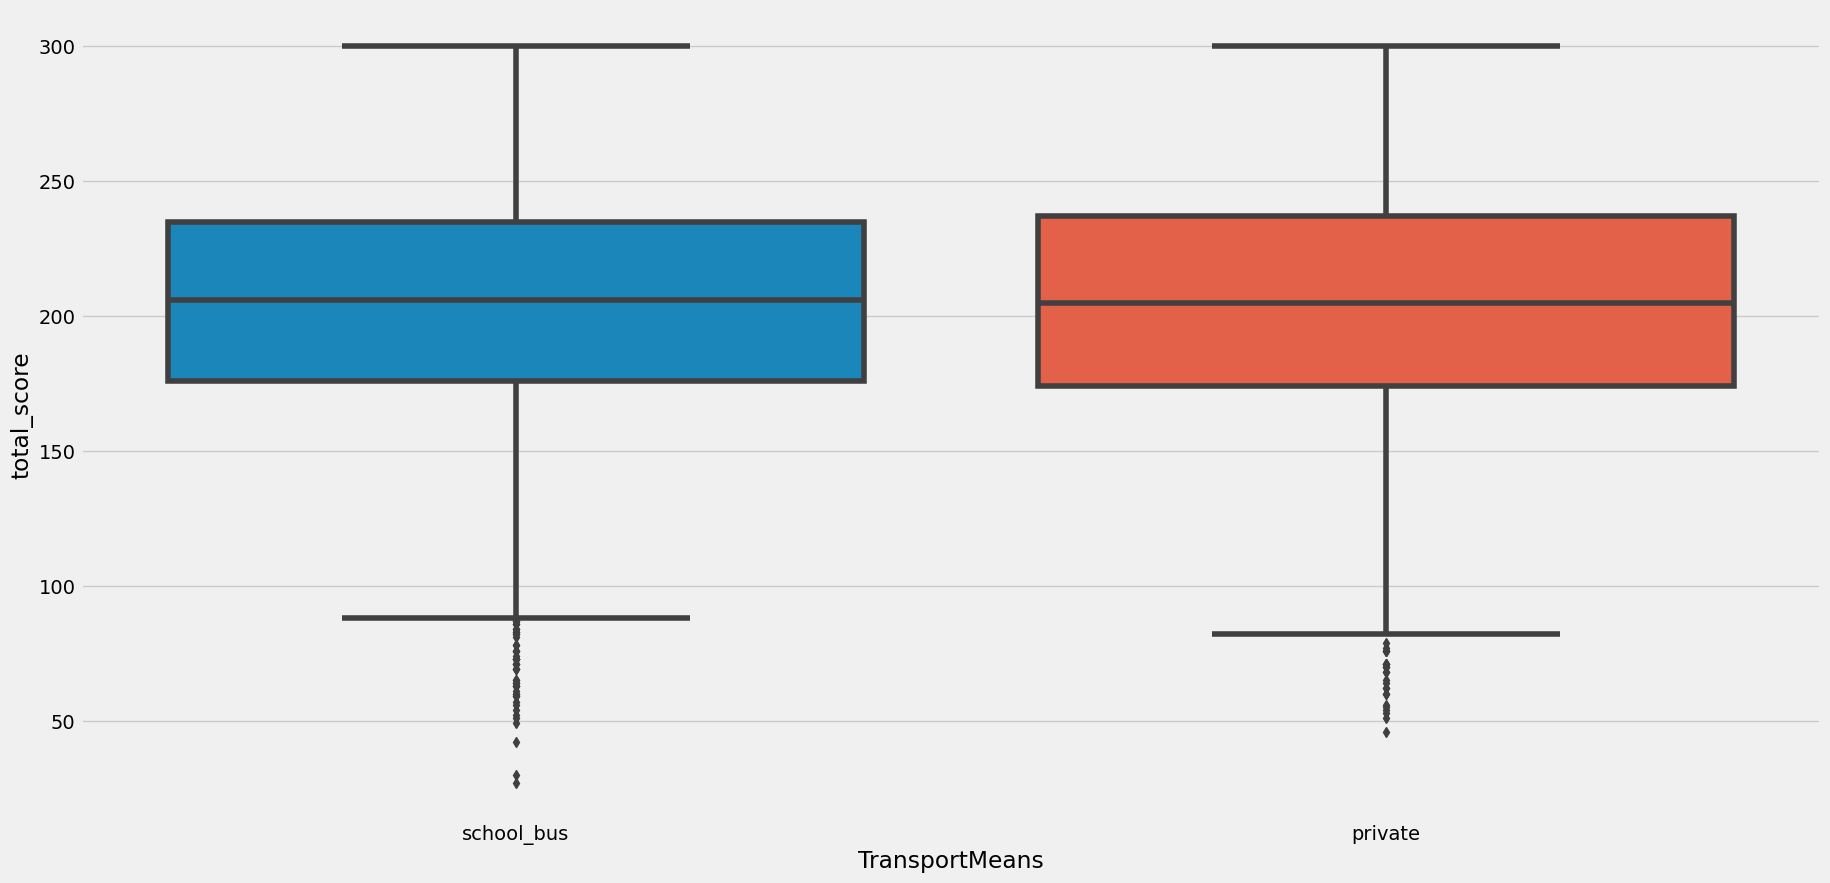

In [147]:
sns.boxplot(x='TransportMeans', y='total_score', data=df)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.518900     69.520030     68.590481
school_bus      66.717819     69.544415     68.611613


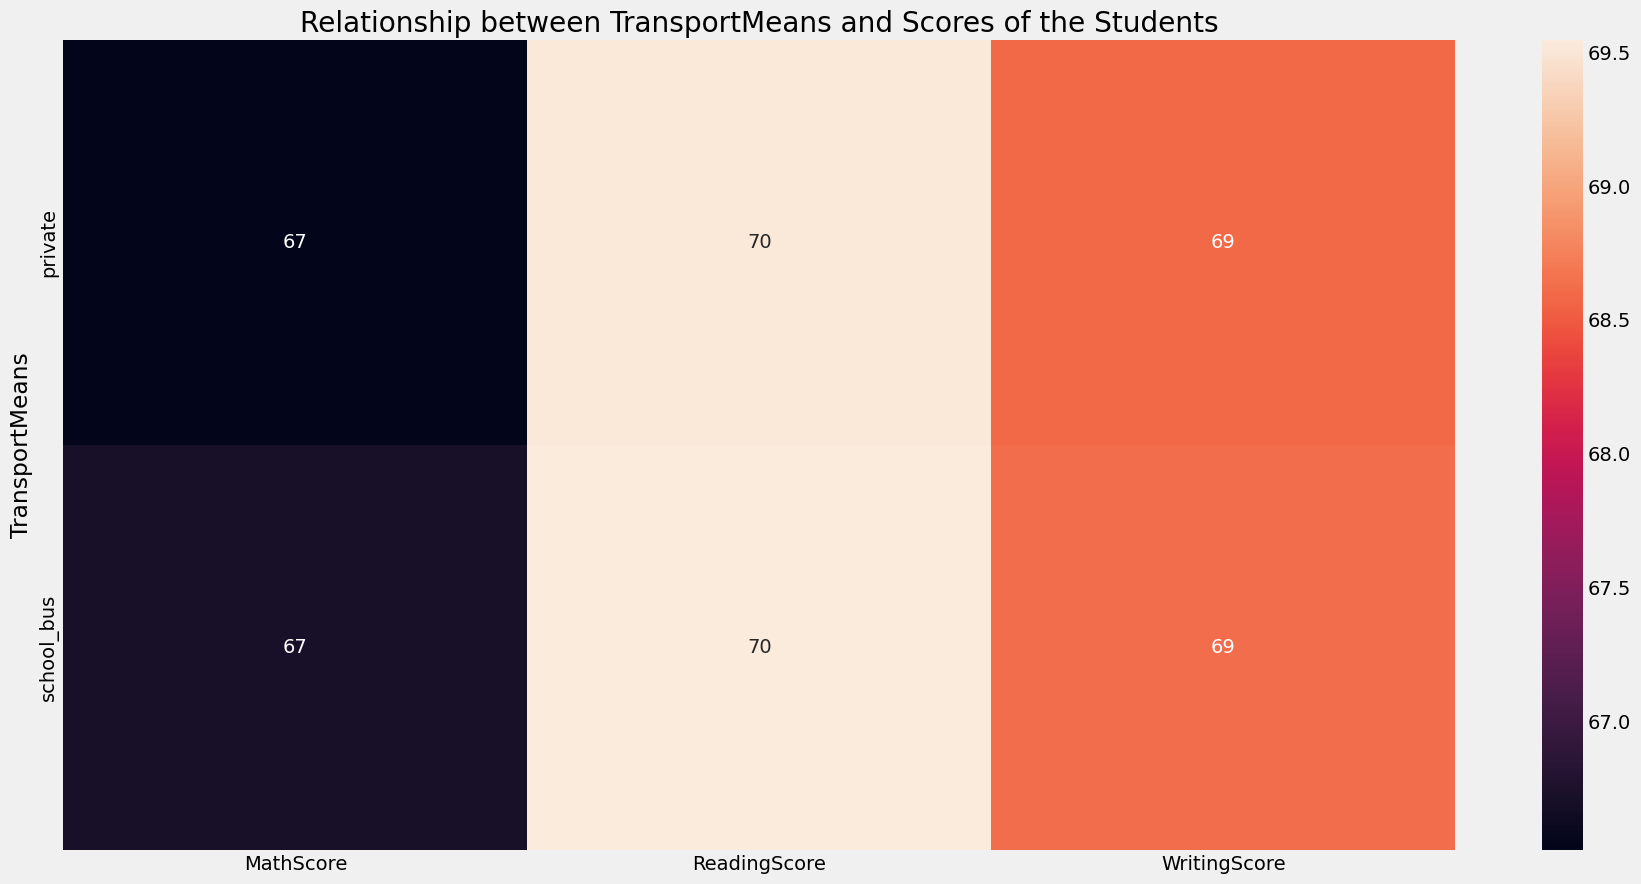

In [148]:
gb = df.groupby("TransportMeans").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb)
sns.heatmap(gb, annot=True)
plt.title("Relationship between TransportMeans and Scores of the Students")
plt.show()

In [149]:
alc_tab = pd.crosstab(index=df.total_score_bin, columns=df.TransportMeans)
alc_table = sm.stats.Table(alc_tab)
alc_rslt = alc_table.test_nominal_association()
print("p-value:", alc_rslt.pvalue)

p-value: 0.3625421737151464


**No relation of TransportMeans with total_score**